In [15]:
import magic
import pandas as pd 
import seaborn as sns
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scanpy.external as sce

plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams['figure.dpi'] = 440

In [16]:
path_to_dir = "/Users/saulvegasauceda/Documents/Spring_23/6.S052/data/"
dropout_file = "dropout_capture_rate=0.3.h5ad"
merfish_file = "merfish_norm.h5ad"

files = list(map( lambda file_name: path_to_dir + file_name, 
    [
        dropout_file,
        merfish_file
    ]
))

In [17]:
adata_objects = list(map(lambda file_path: sc.read_h5ad(file_path).to_df(), files))

In [18]:
dropout_df, merfish_df = adata_objects

In [19]:
# Rename merfish columns
merfish = sc.read_h5ad(path_to_dir + merfish_file)
ensmug_to_name = dict(zip(merfish.var.index, merfish.var["gene_name"]))
merfish_df.rename(columns=ensmug_to_name, inplace=True)
merfish = None

In [20]:
dropout_df["Data"] = "Non-imputed"
merfish_df["Data"] = "MERFISH"

In [21]:
# before_imputation = pd.concat([ground_truth_df,dropout_df], ignore_index=True)
# best_imputation = pd.concat([before_imputation, best_run_df])
# worst_imputation = pd.concat([before_imputation, worst_run_df])

In [22]:
before_imputation = pd.concat([merfish_df, dropout_df], ignore_index=True)

In [23]:
genes = merfish_df.columns[:-1]

In [25]:
merfish_df

ENSMUSG,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,Adra1b,Alk,...,Tac2,Lamp5,Cnr1,Pvalb,Sst,Rab3b,Slc17a7,Penk,Gad1,Data
index,,,,,,,,,,,,,,,,,,,,,
10000143038275111136124942858811168393,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,2.930445,0.000000,...,1.164753,0.167091,0.047249,0.857430,0.354103,0.280821,2.727746,0.172048,0.000000,MERFISH
100001798412490480358118871918100400402,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,1.169647,0.485960,0.000000,0.832244,0.888047,1.077430,3.201379,0.266251,0.000000,MERFISH
100006878605830627922364612565348097824,0.0,0.000000,0.0,0.000000,85.098572,0.0,0.000000,0.0,0.000000,0.000000,...,0.381616,0.000000,0.233759,0.480275,0.170920,0.493384,1.493905,0.139473,0.000000,MERFISH
100007228202835962319771548915451072492,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.261514,0.092665,0.425073,0.552827,0.031912,0.309839,3.128700,0.046087,1.308937,MERFISH
100009332472089331948140672873134747603,0.0,0.604816,0.0,1.209633,0.604816,0.0,0.000000,0.0,1.209633,0.000000,...,0.656209,4.541411,0.000000,0.364846,0.920537,1.751143,14.007547,0.476601,0.000000,MERFISH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110846532393417732277646107991281146314,0.0,3.303807,0.0,0.000000,1.101269,0.0,0.000000,0.0,5.506345,0.000000,...,0.561149,0.000000,0.528000,1.309236,0.300309,1.388829,15.938806,0.255797,1.436345,MERFISH
110847397958625790380846595524548372877,0.0,0.000000,0.0,0.000000,1.268680,0.0,0.000000,0.0,0.000000,1.268680,...,0.467959,3.763245,0.000000,0.529815,0.000000,1.625458,14.888186,0.753298,0.798450,MERFISH
11084810815951583182442661876126315180,0.0,0.000000,0.0,0.000000,0.772662,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,4.144485,0.424908,0.424142,0.000000,0.630728,7.366621,0.258525,0.733118,MERFISH


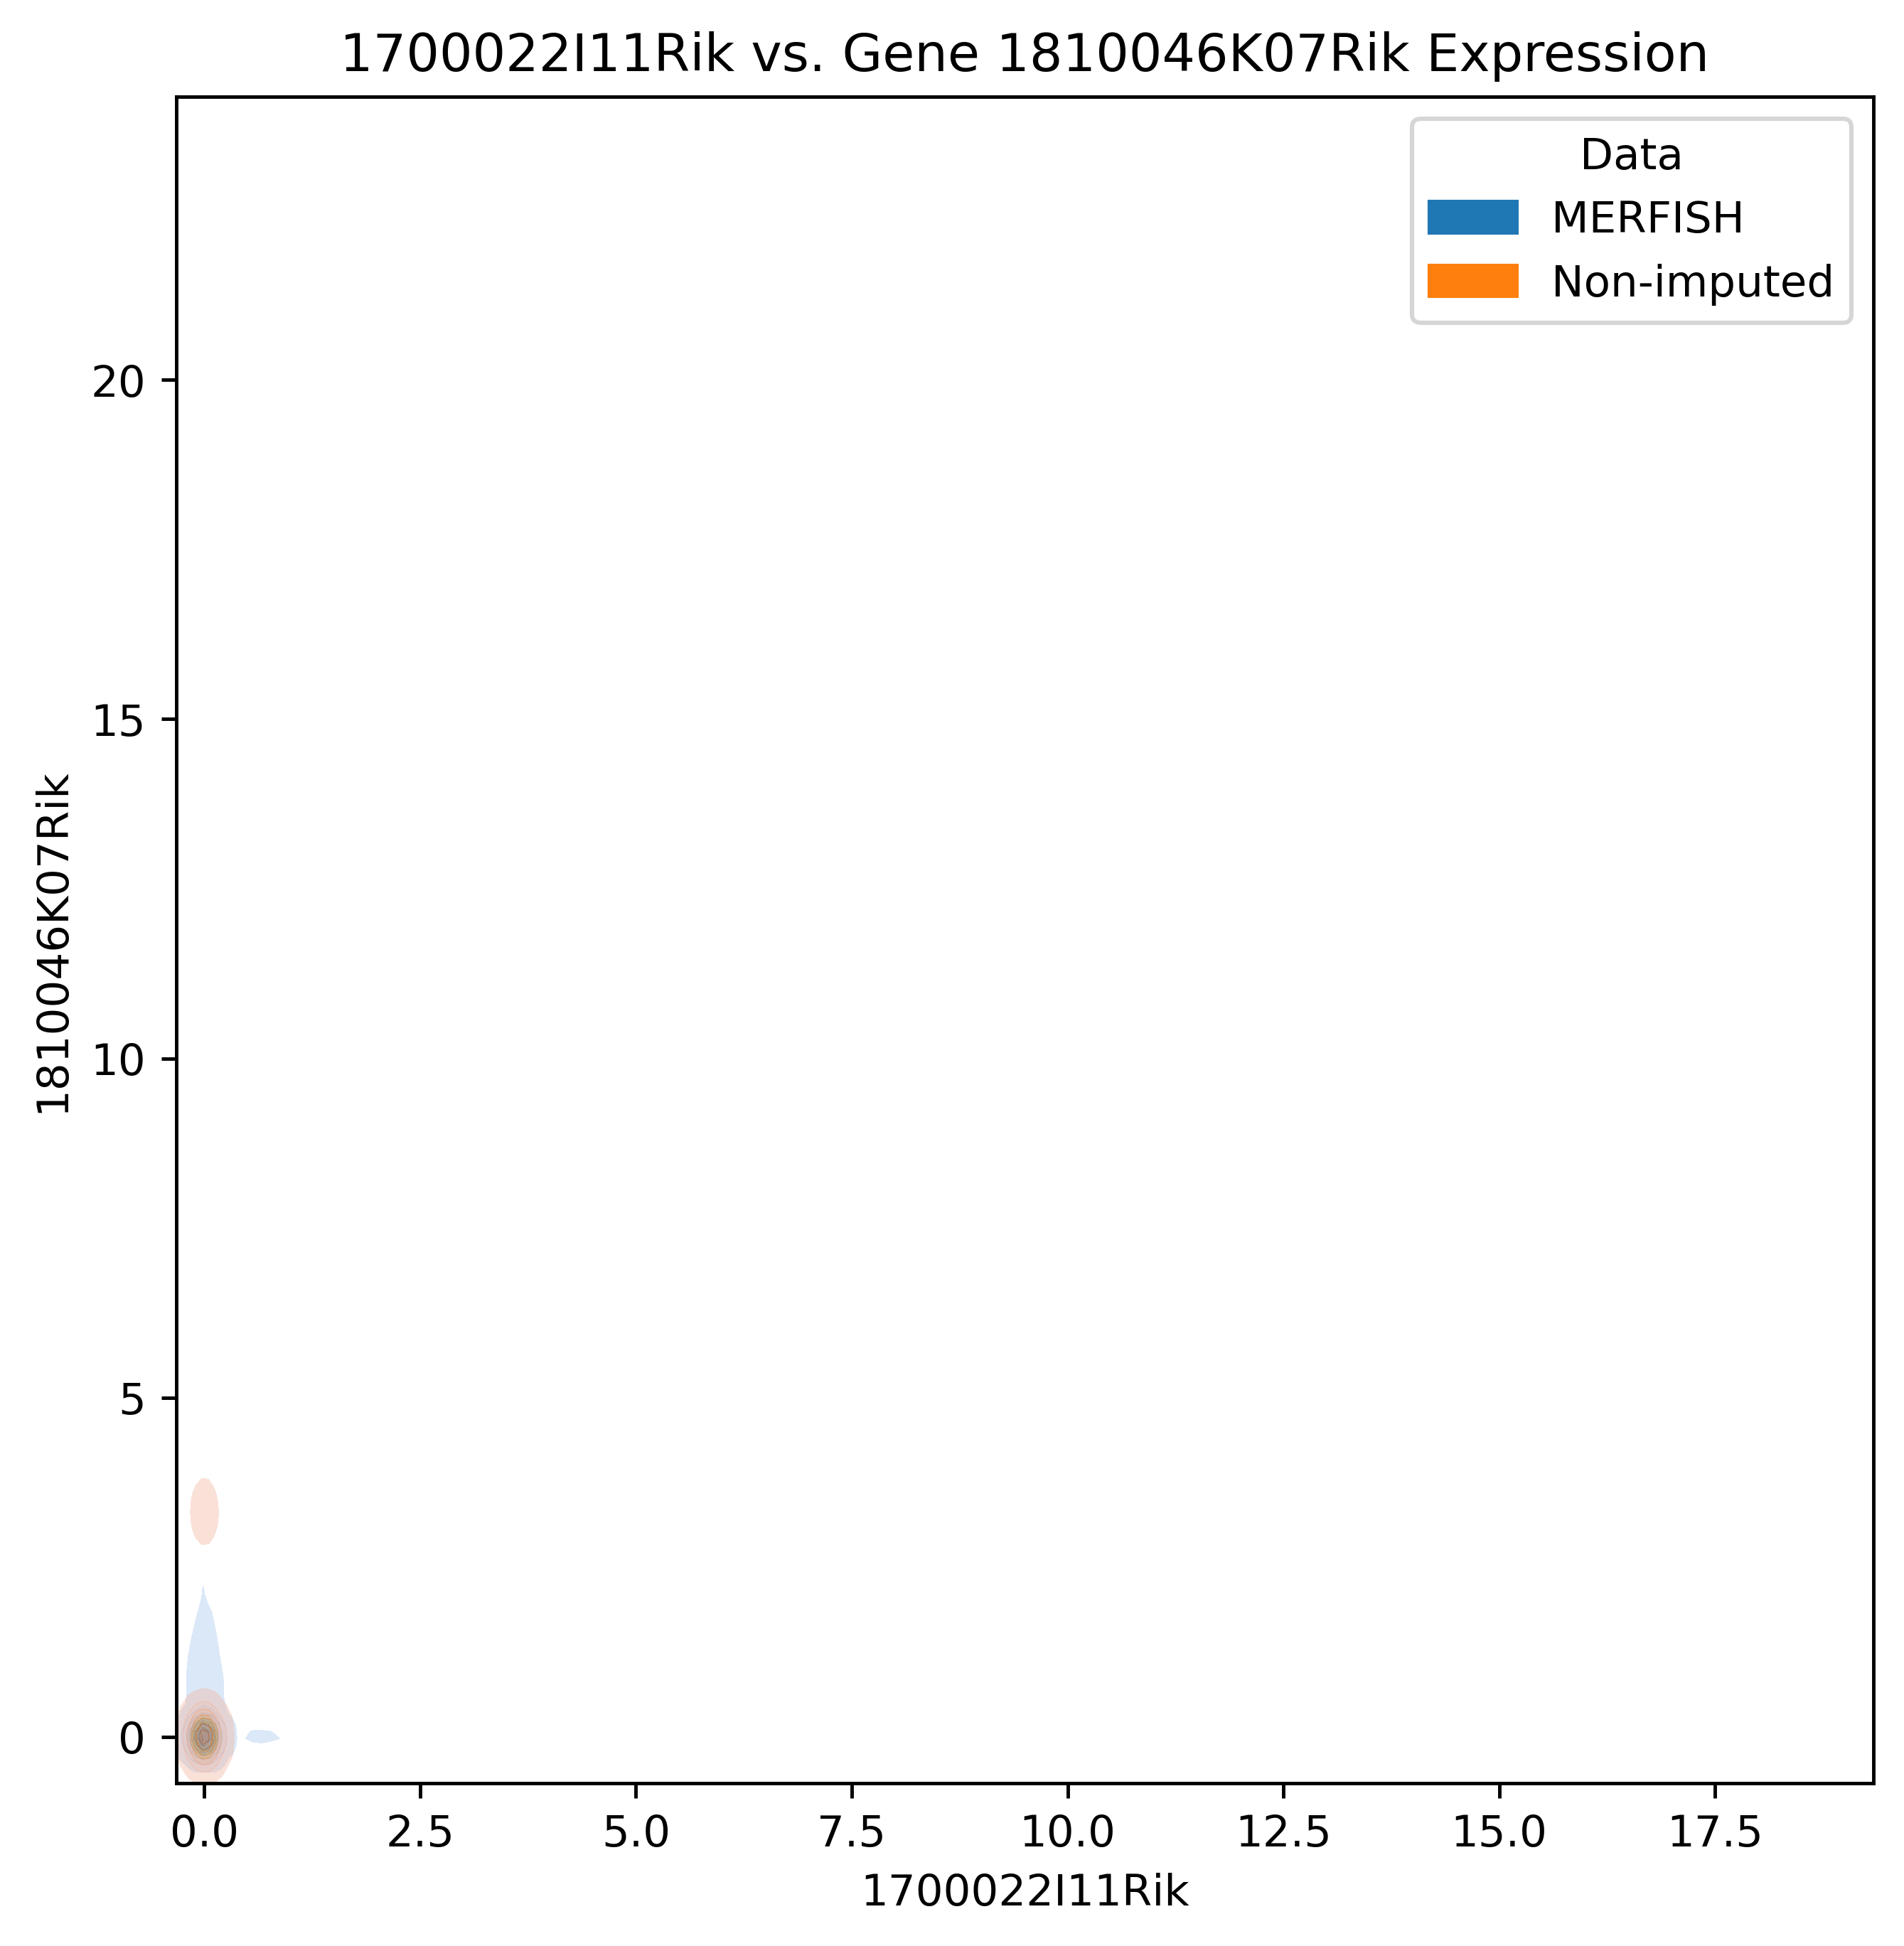

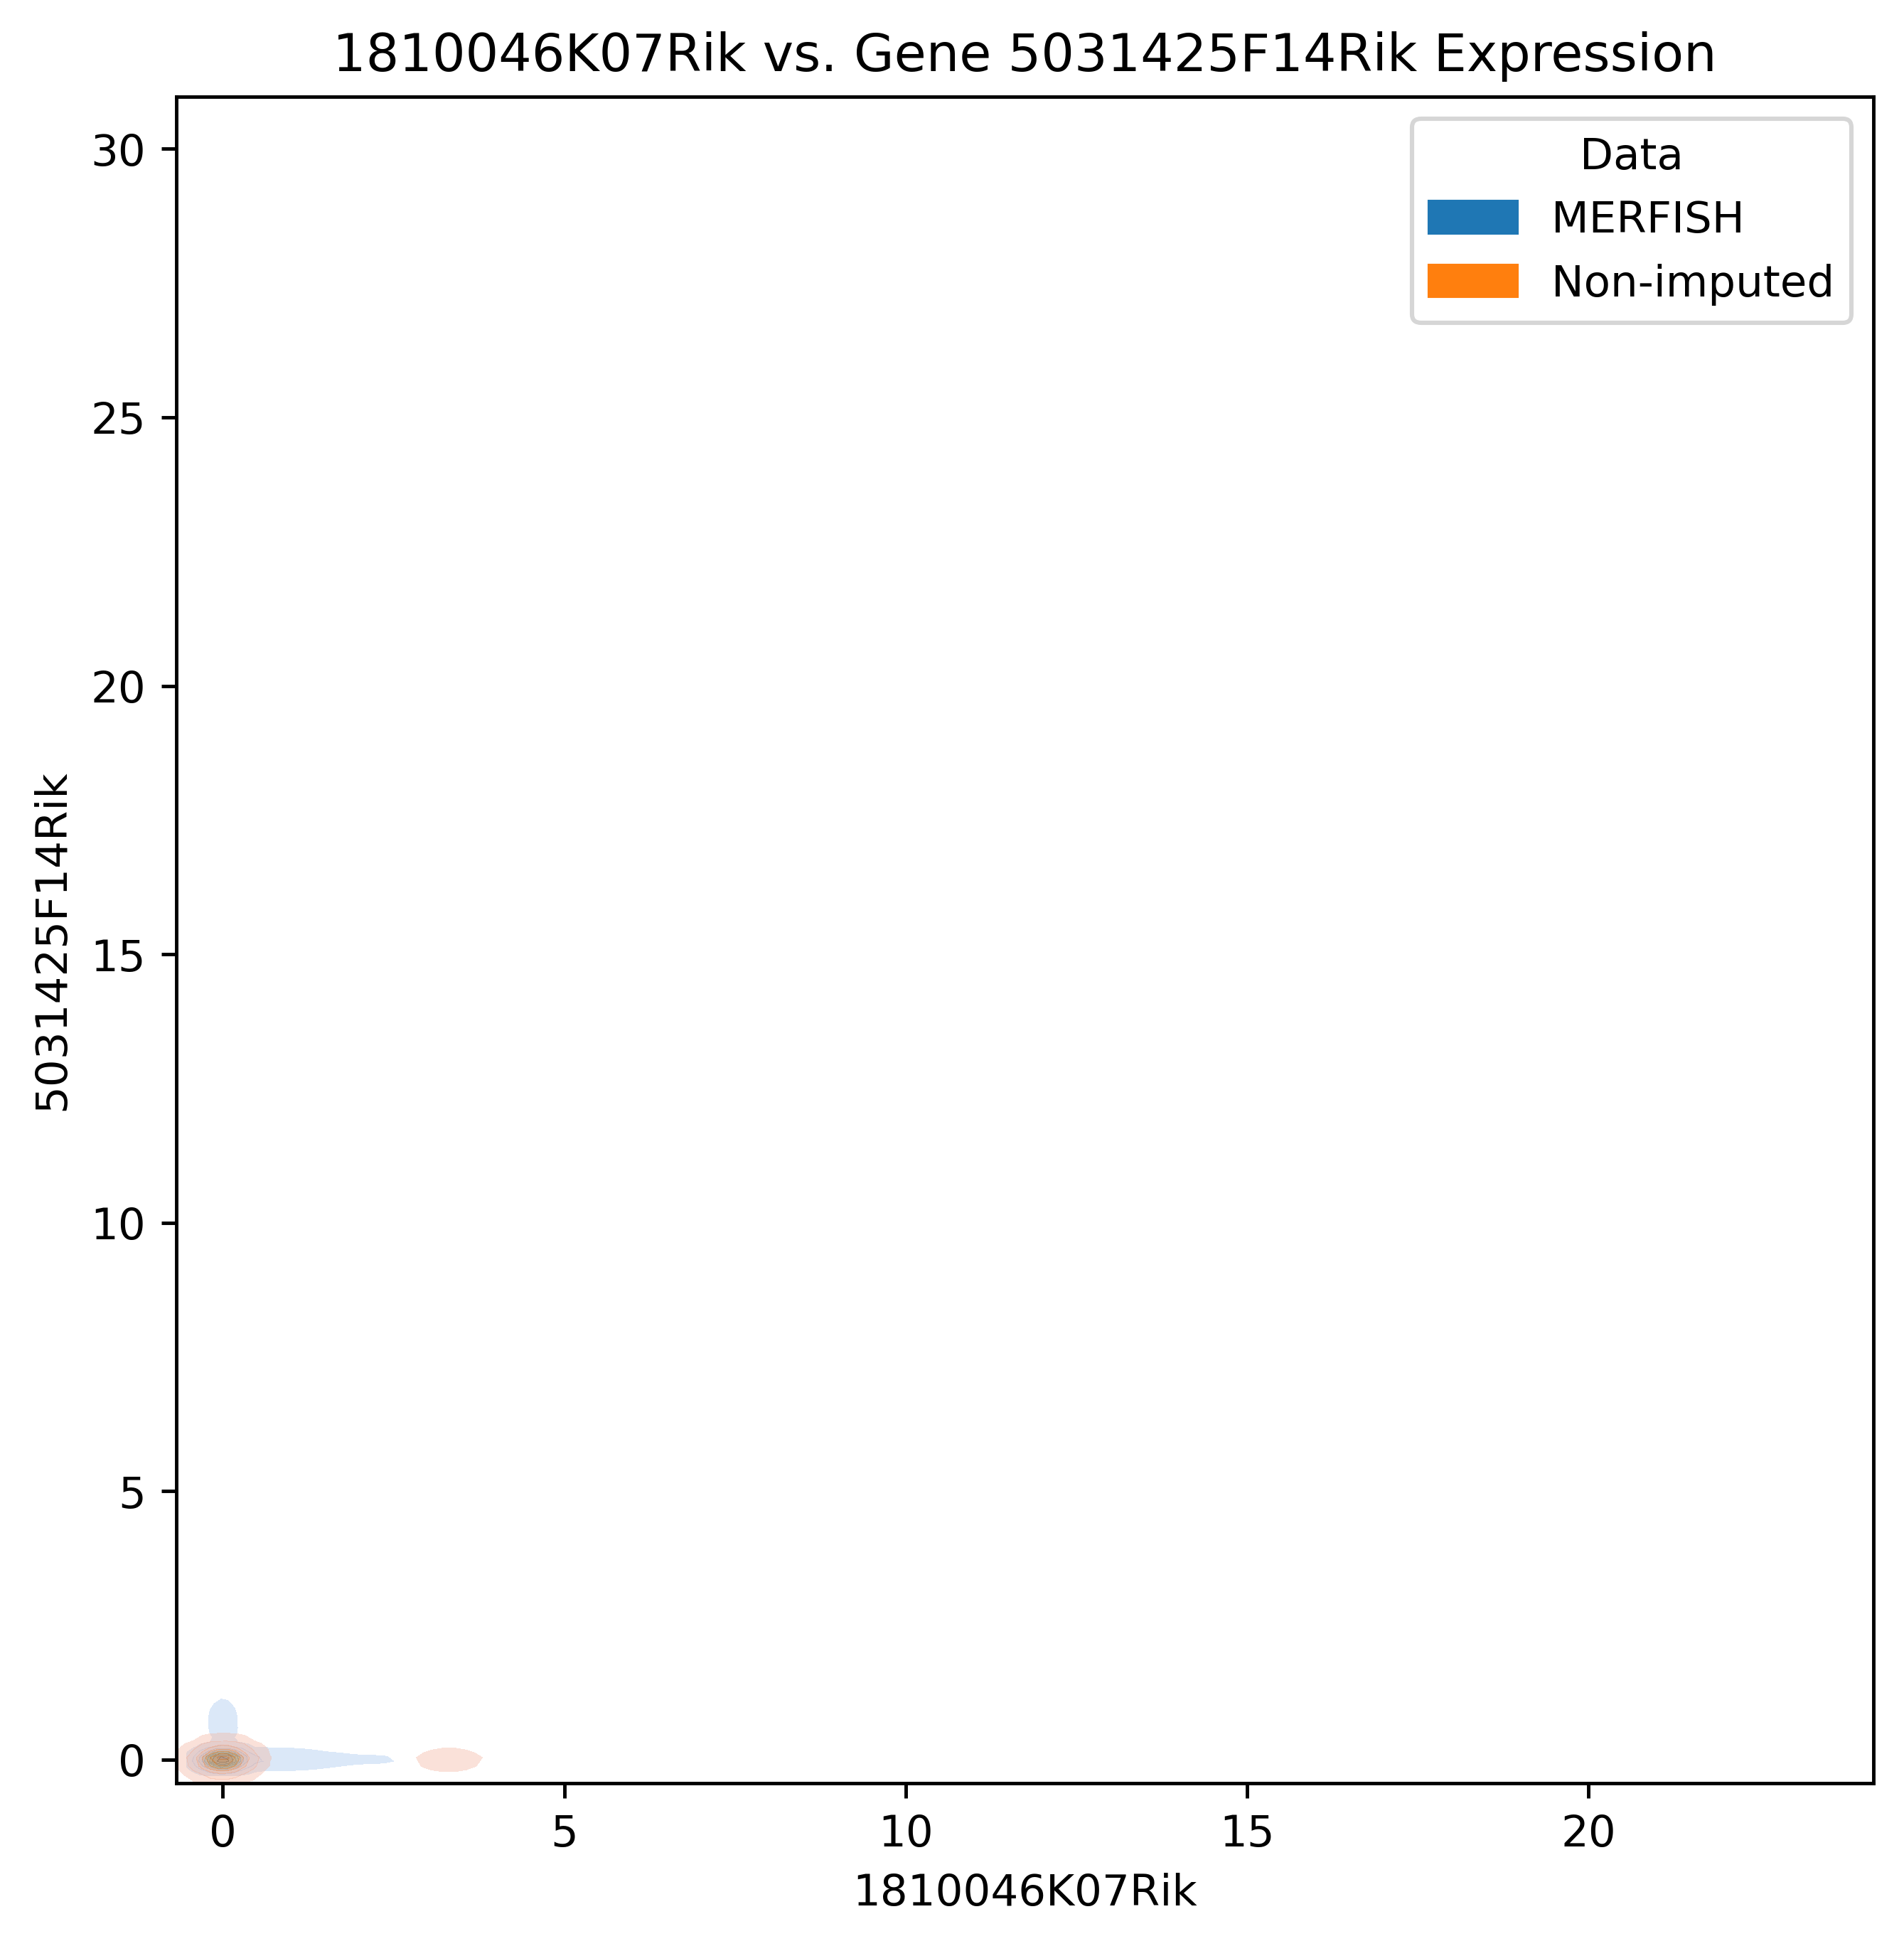

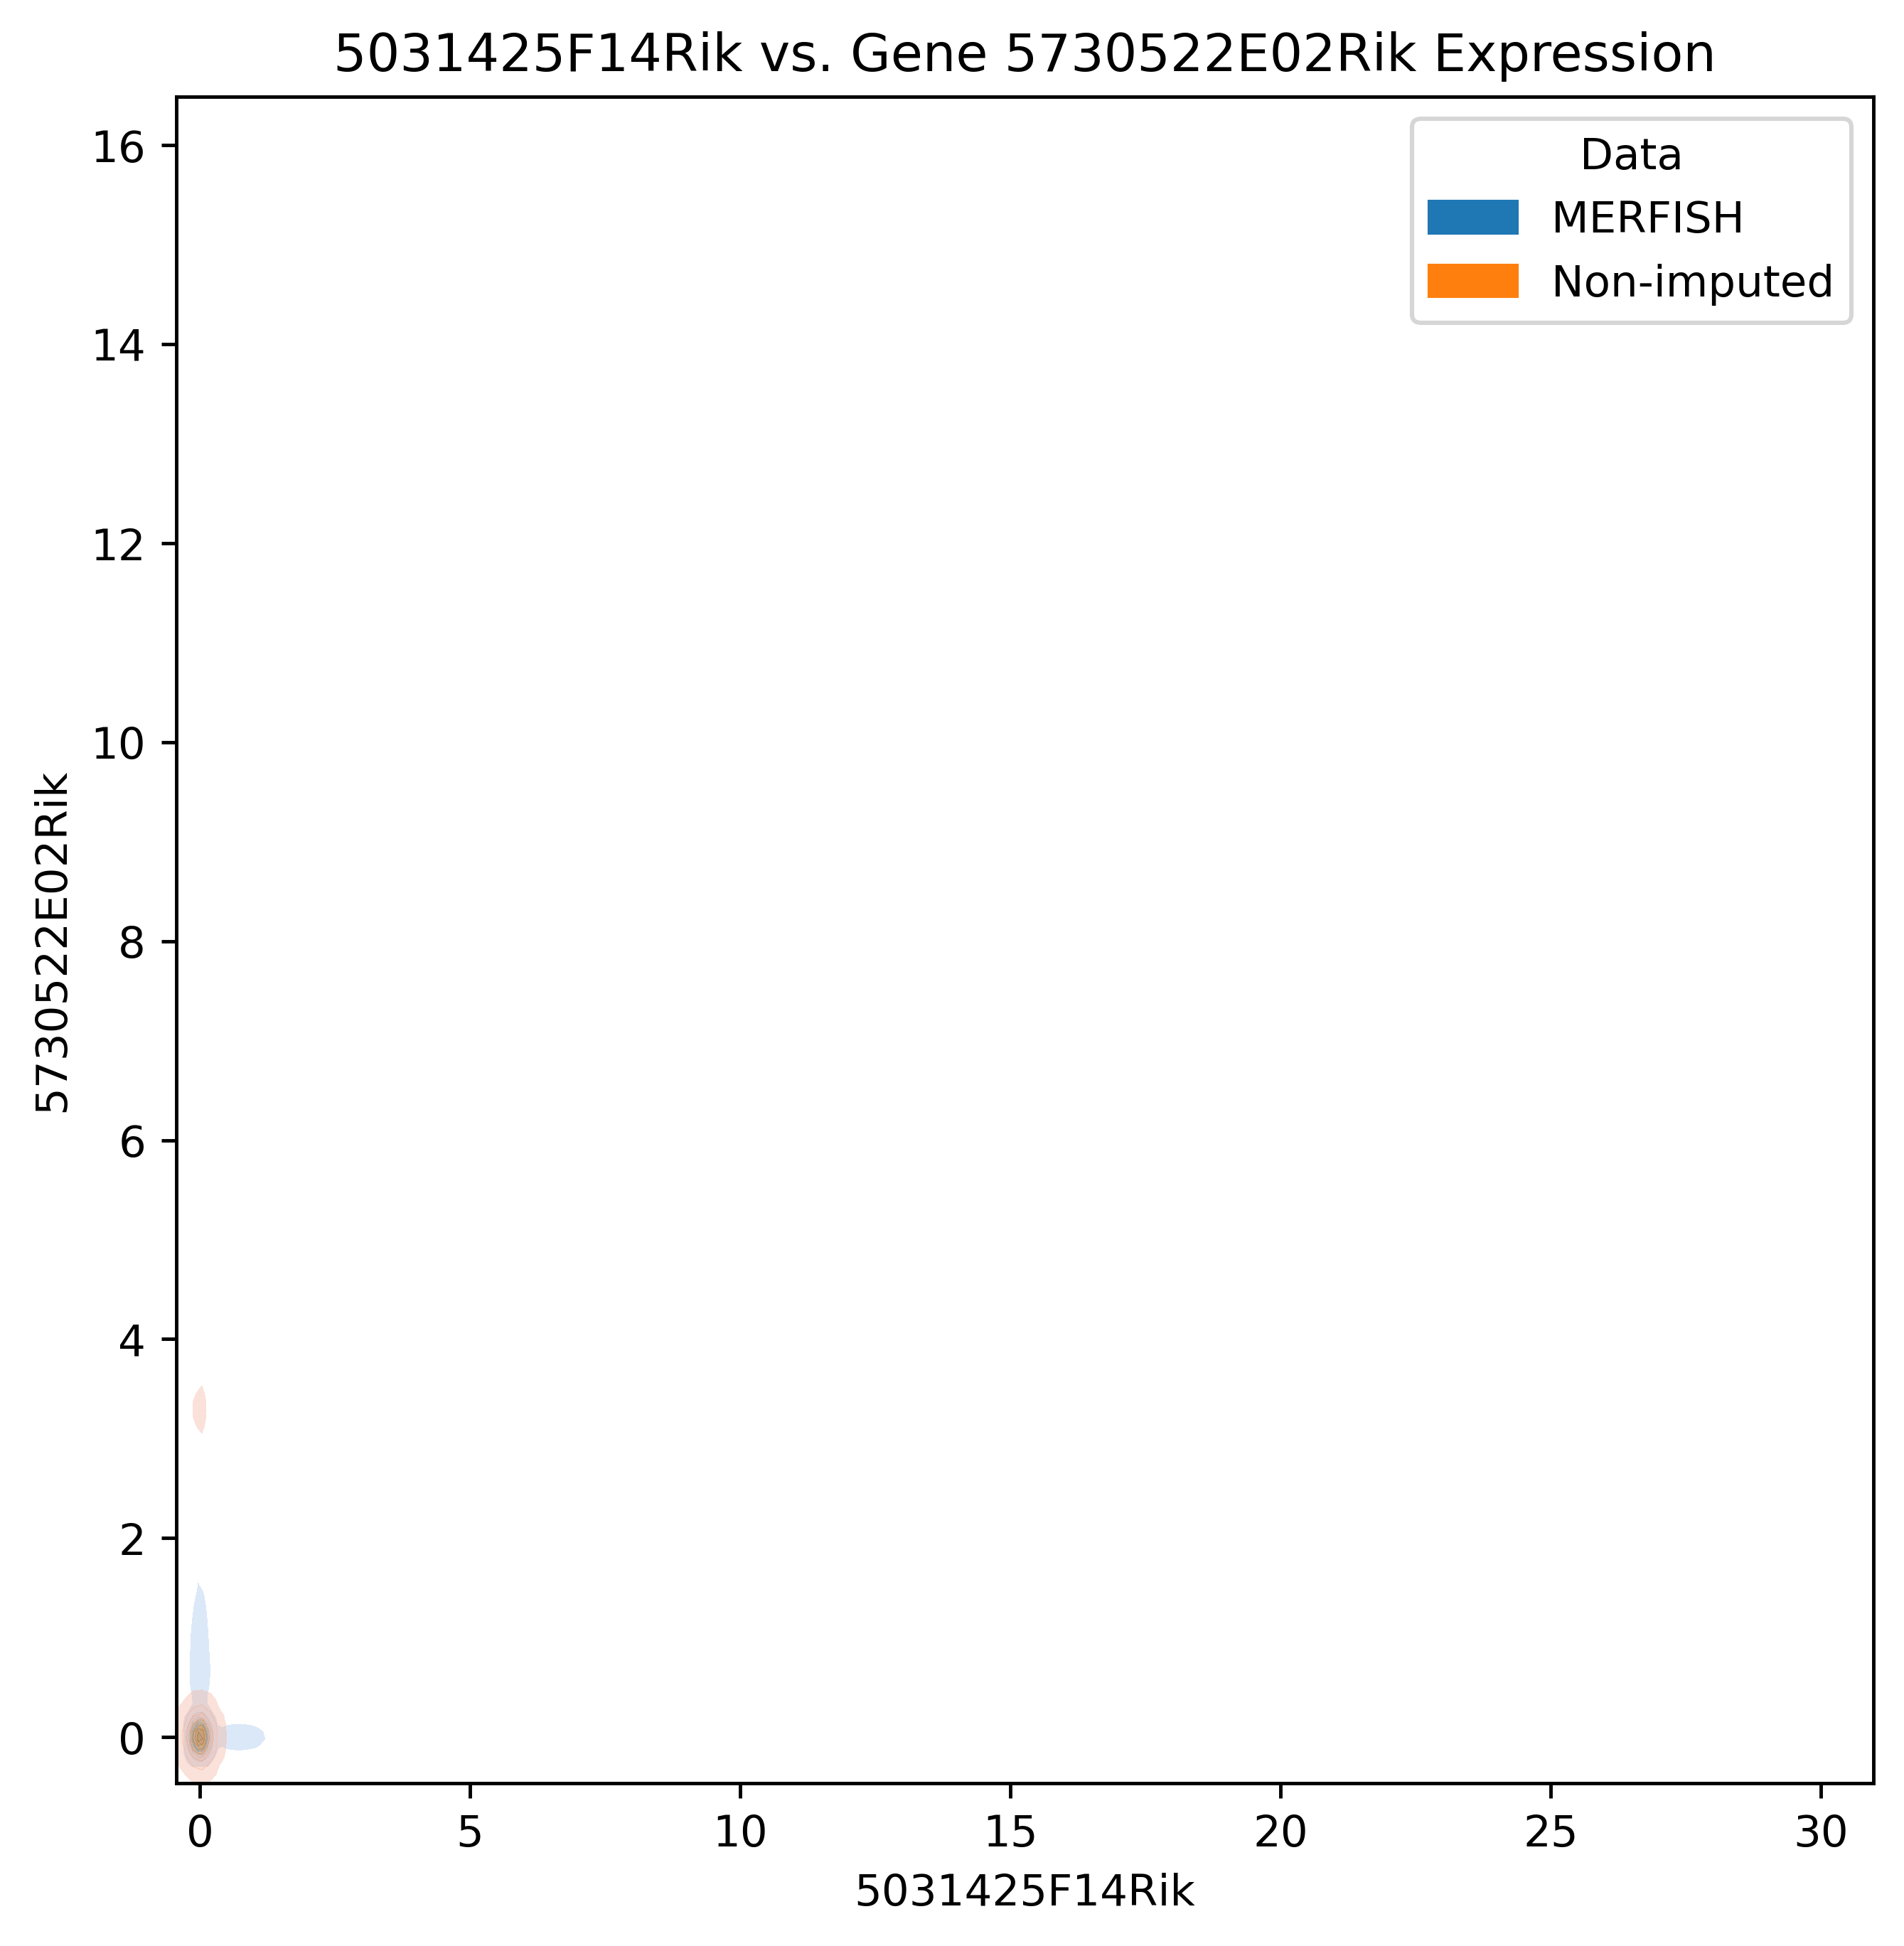

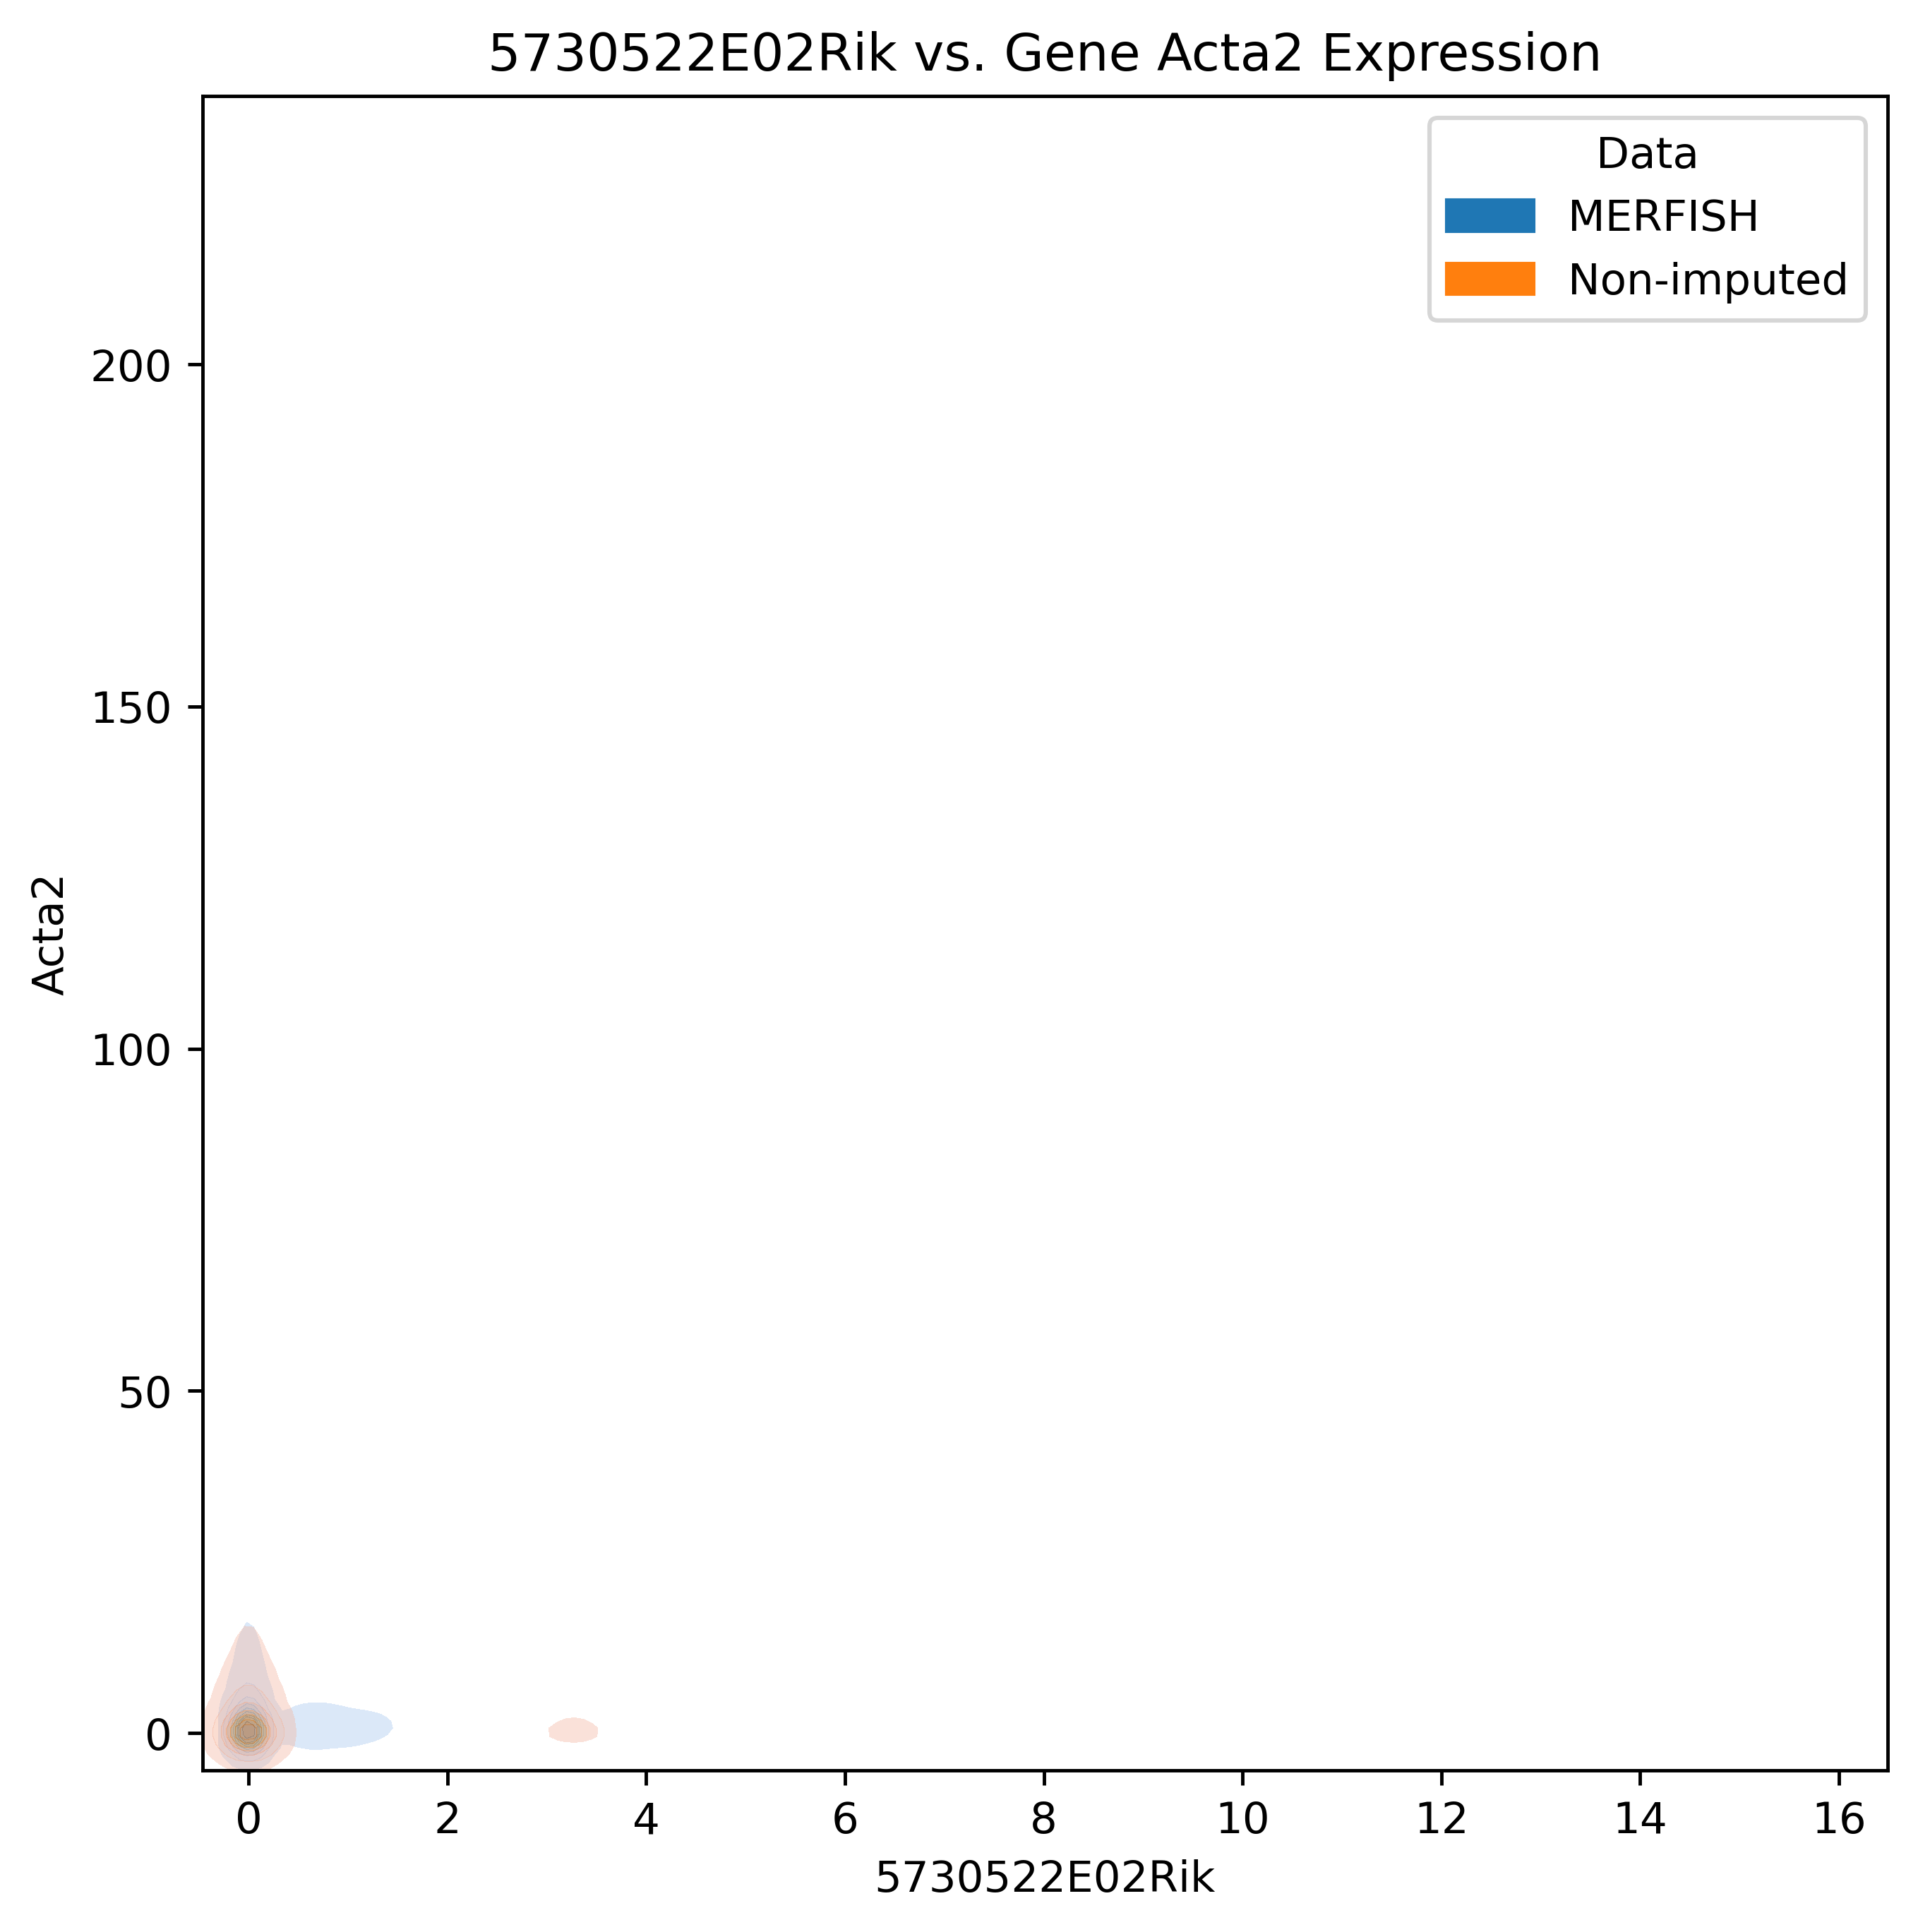

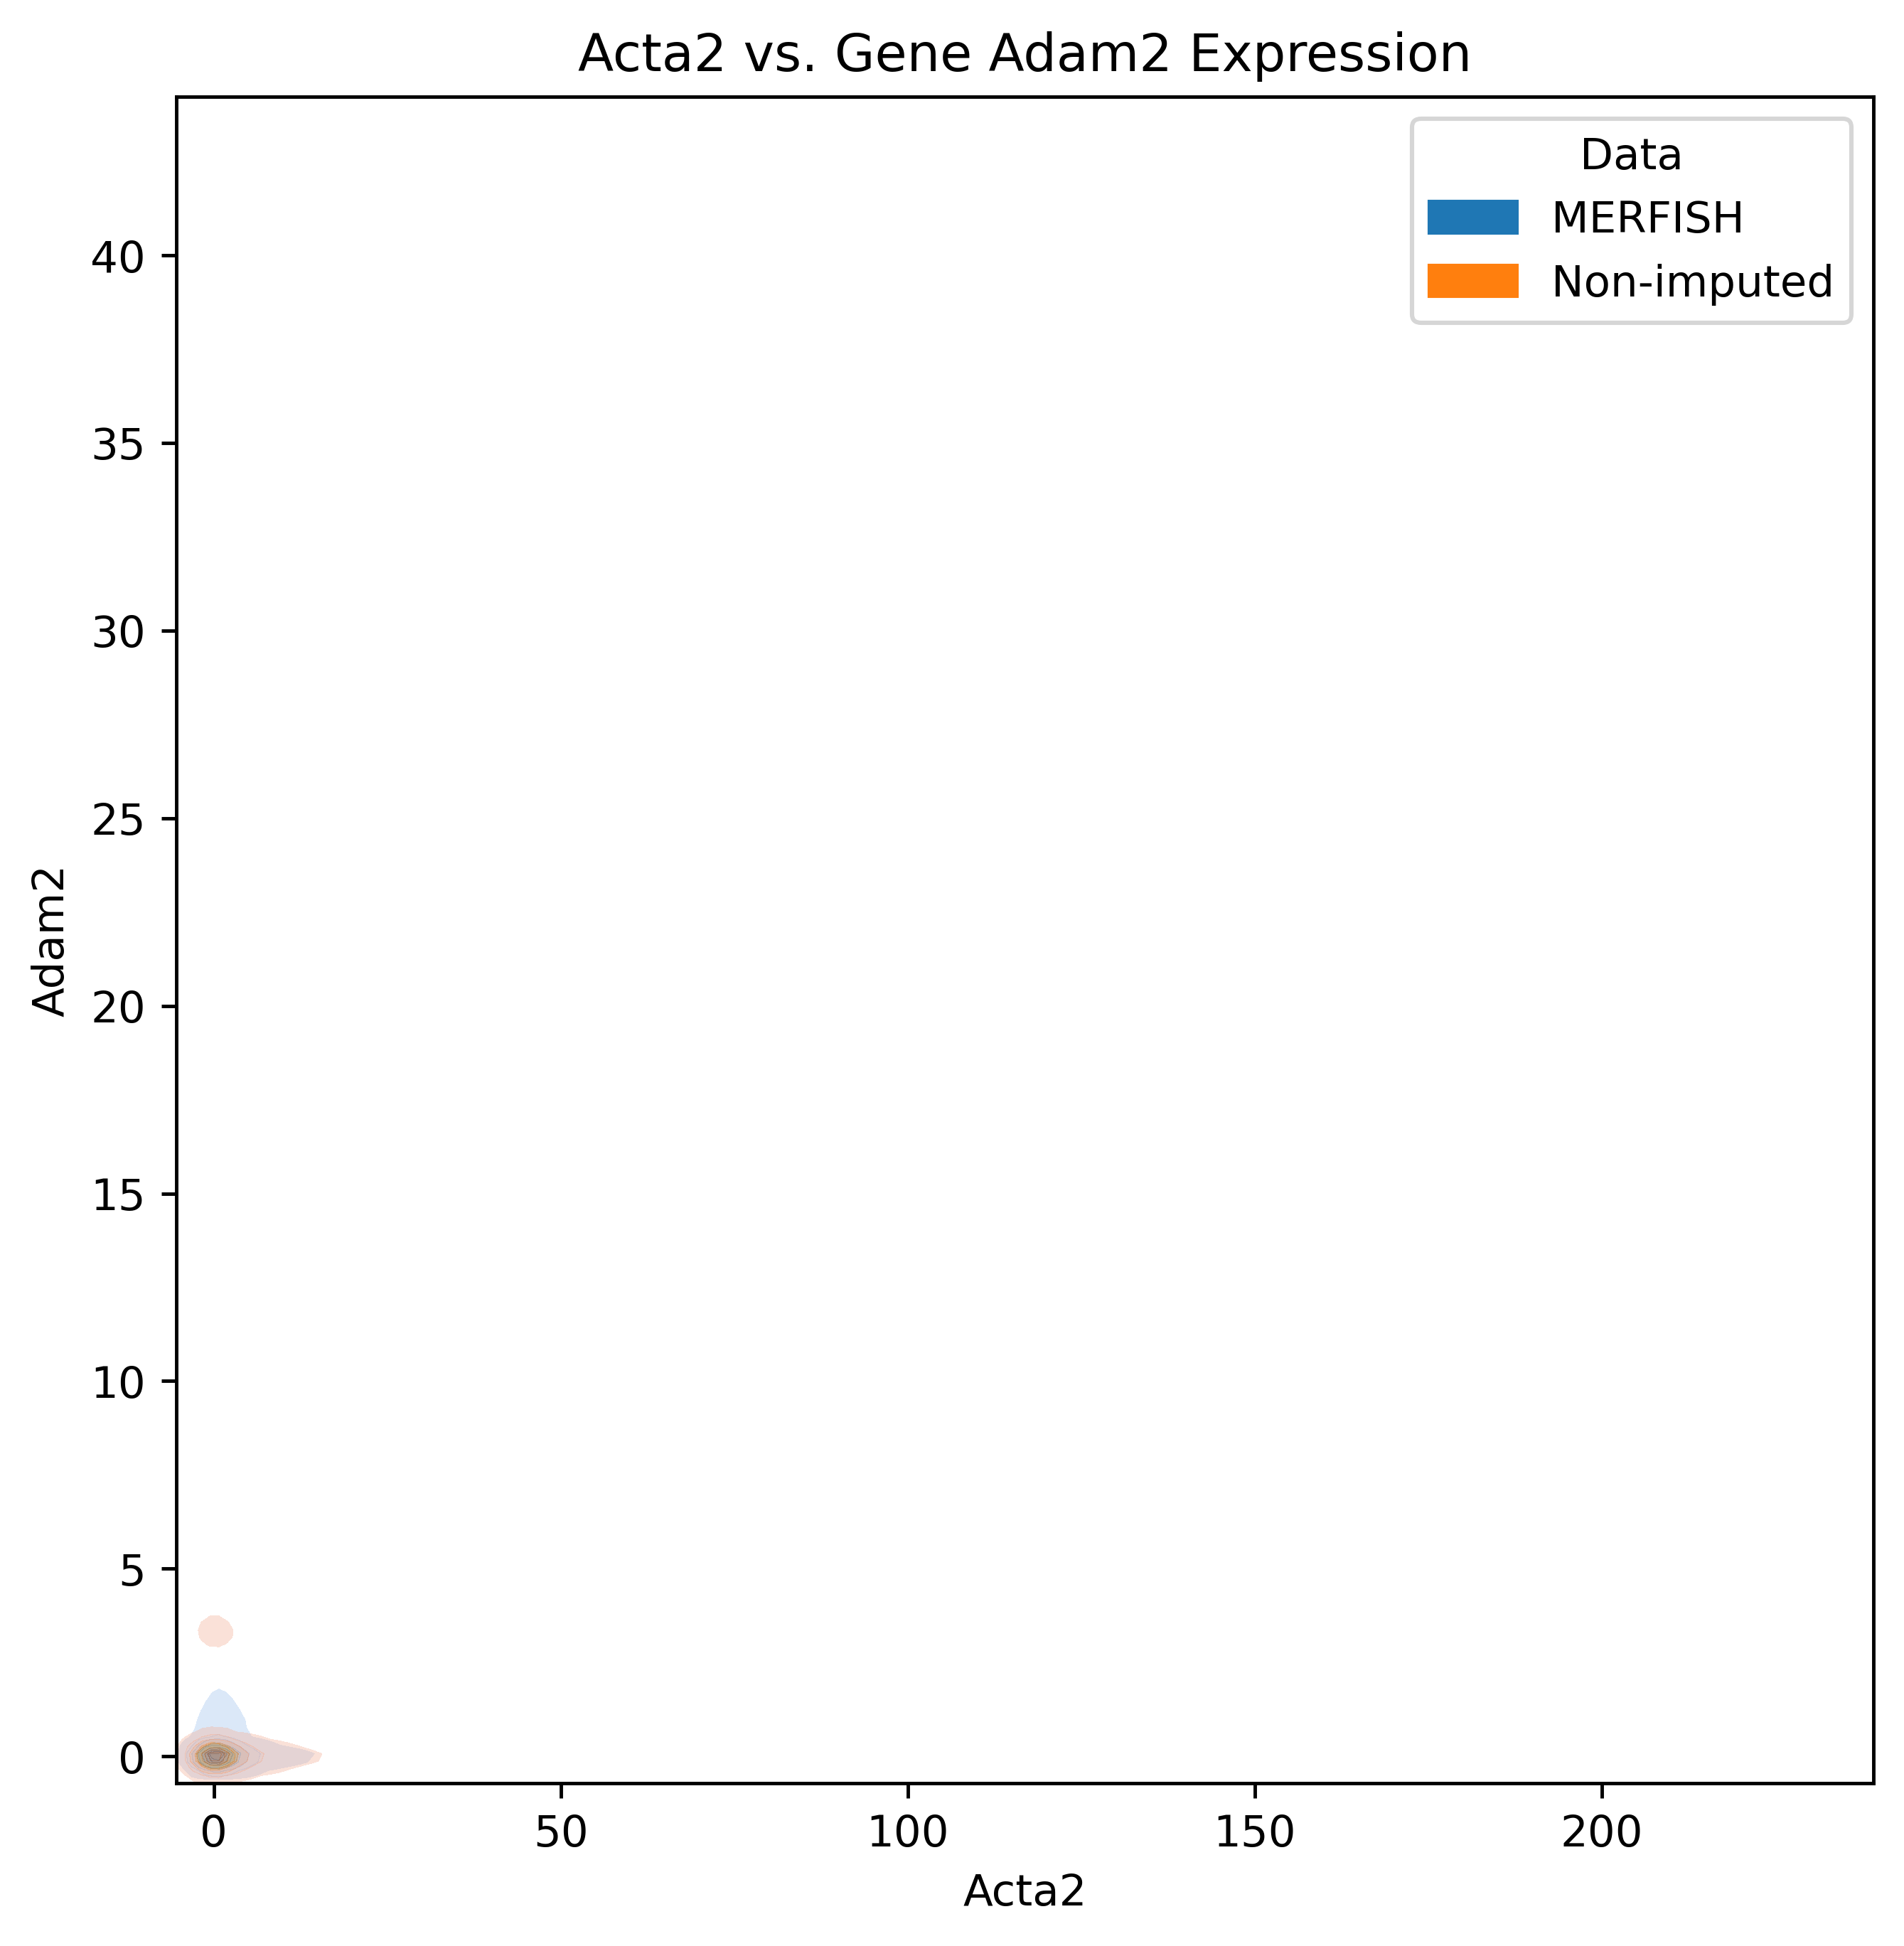

In [27]:
for i in range(5): 
    plt.figure()
    sns.kdeplot(data=before_imputation, x=genes[i], y =genes[i+1], hue="Data", alpha=0.4, fill=True).set(title=f'{genes[i]} vs. Gene {genes[i+1]} Expression')

[Text(0.5, 1.0, 'Rab3b vs. Lamp5 Expression')]

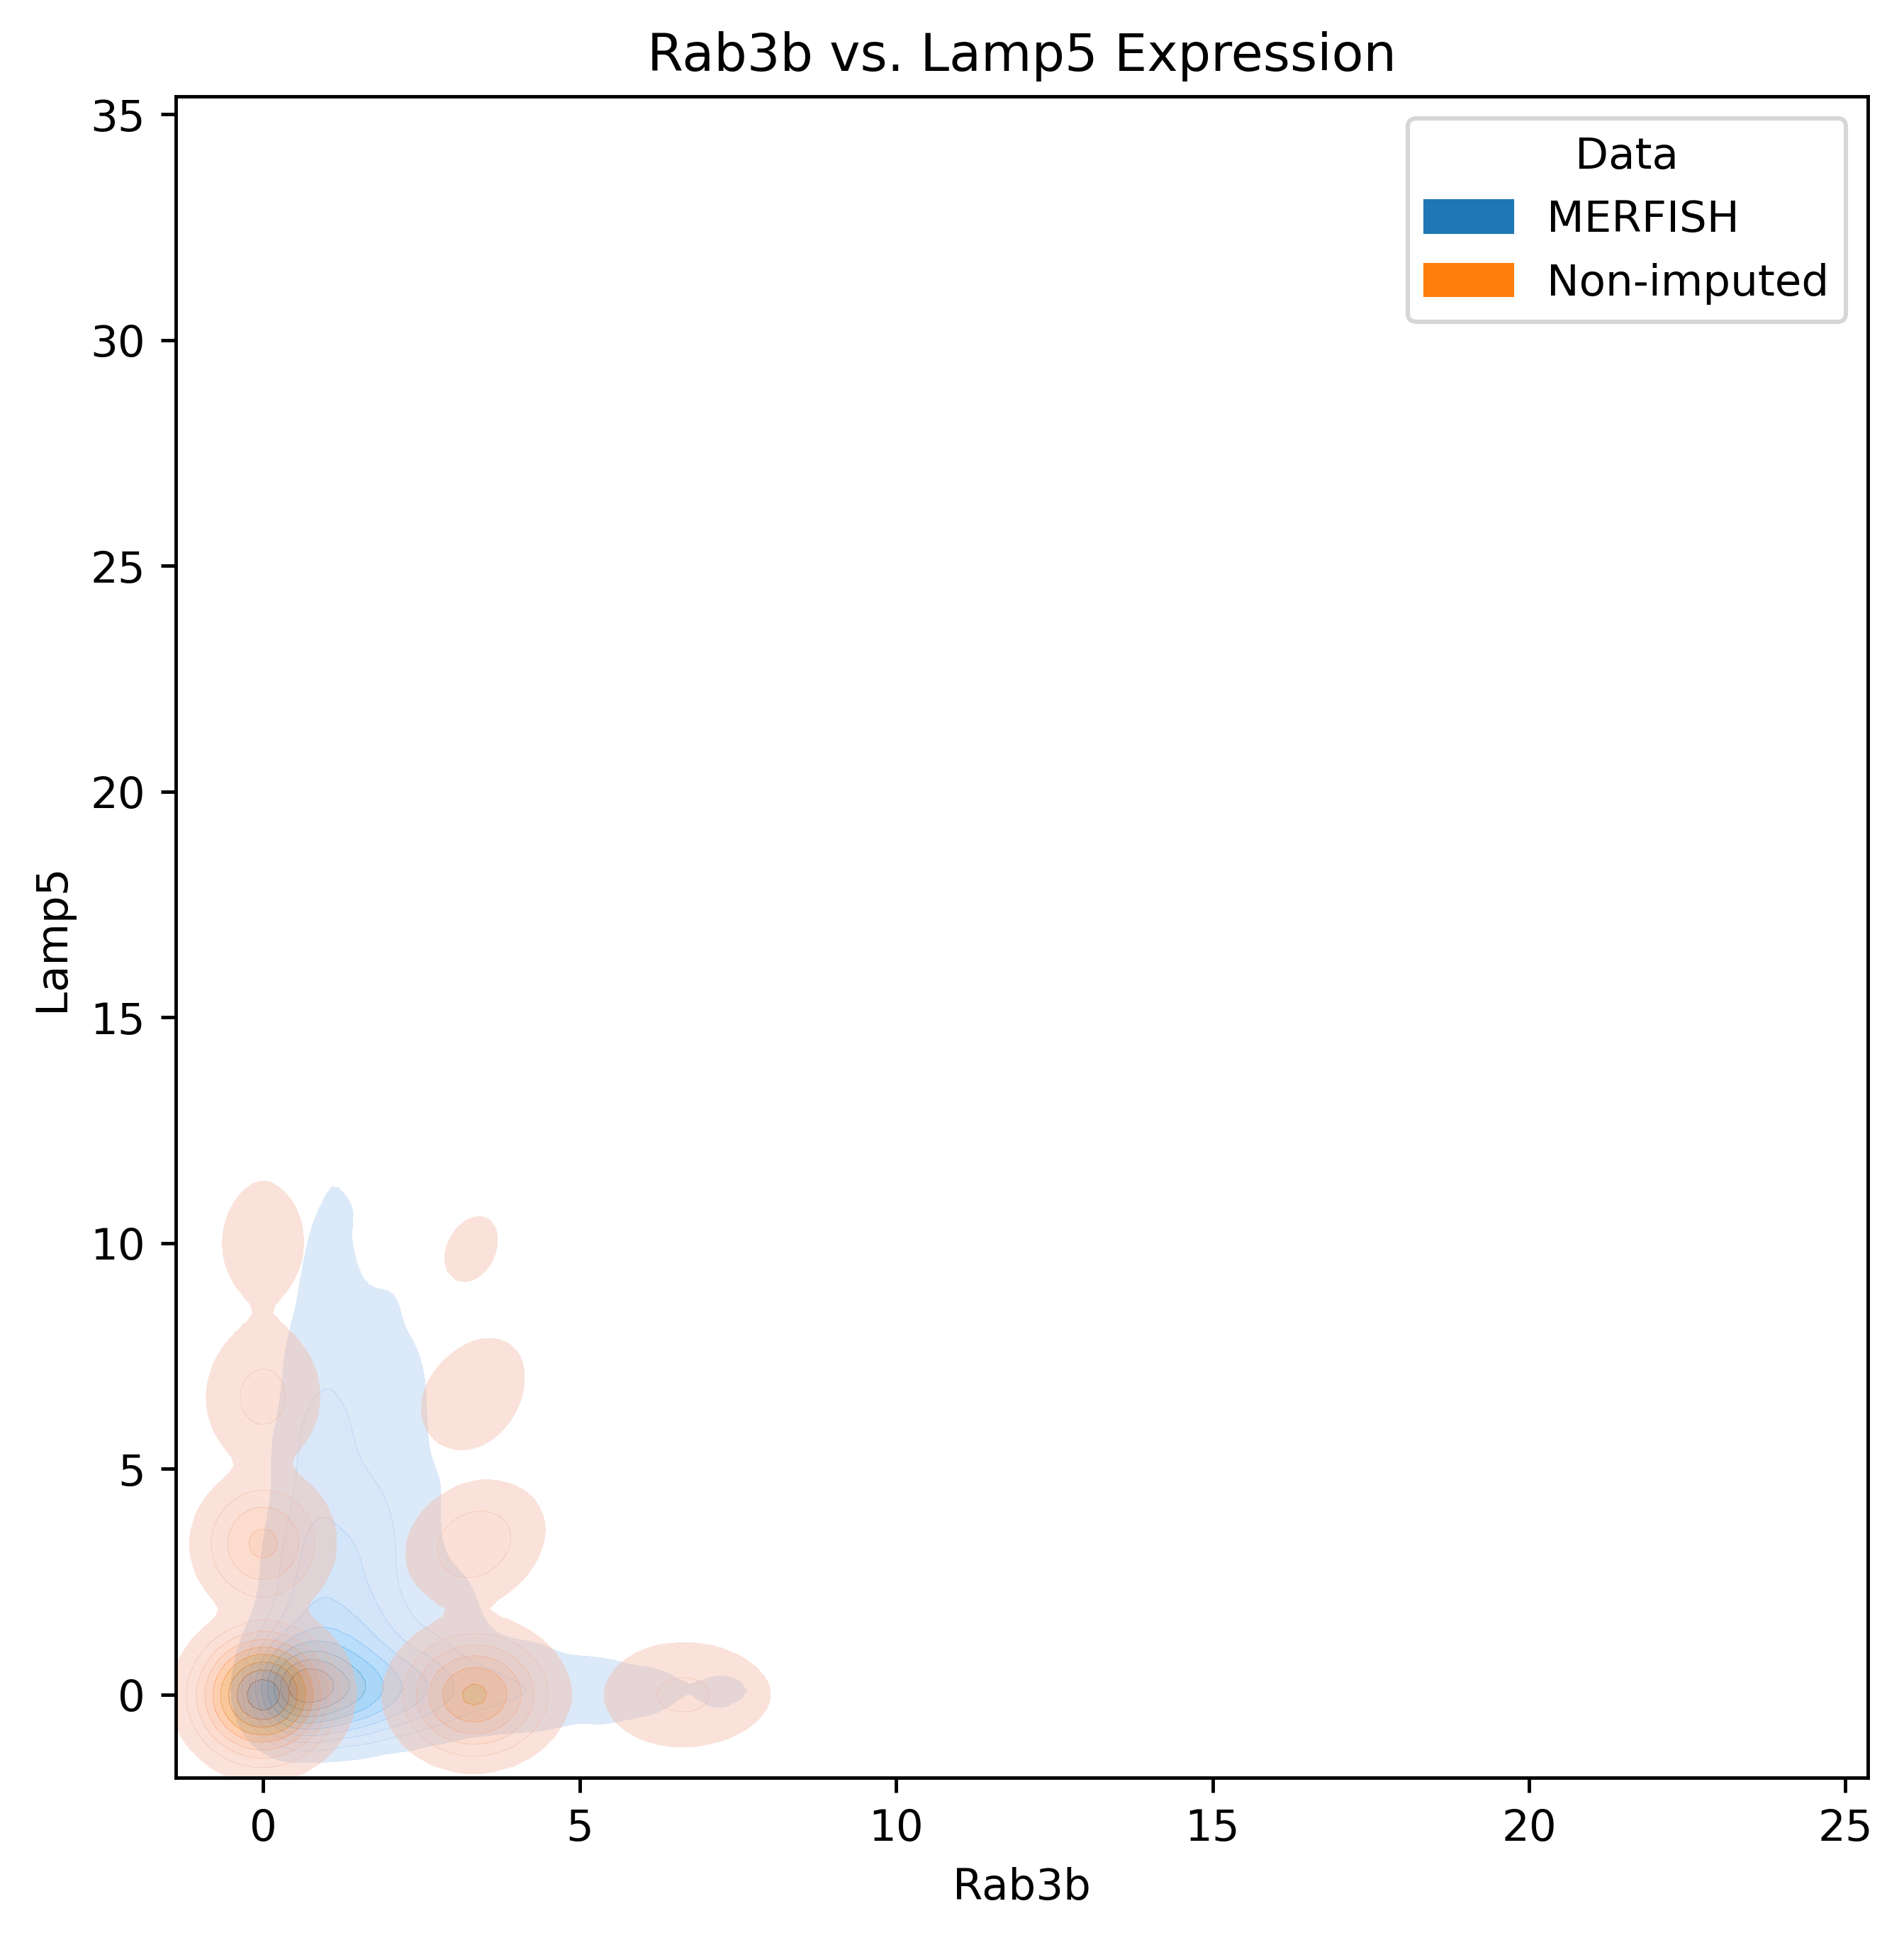

In [30]:

plt.figure()
sns.kdeplot(data=before_imputation, x="Rab3b", y ="Lamp5", hue="Data", alpha=0.4, fill=True).set(title=f'Rab3b vs. Lamp5 Expression')

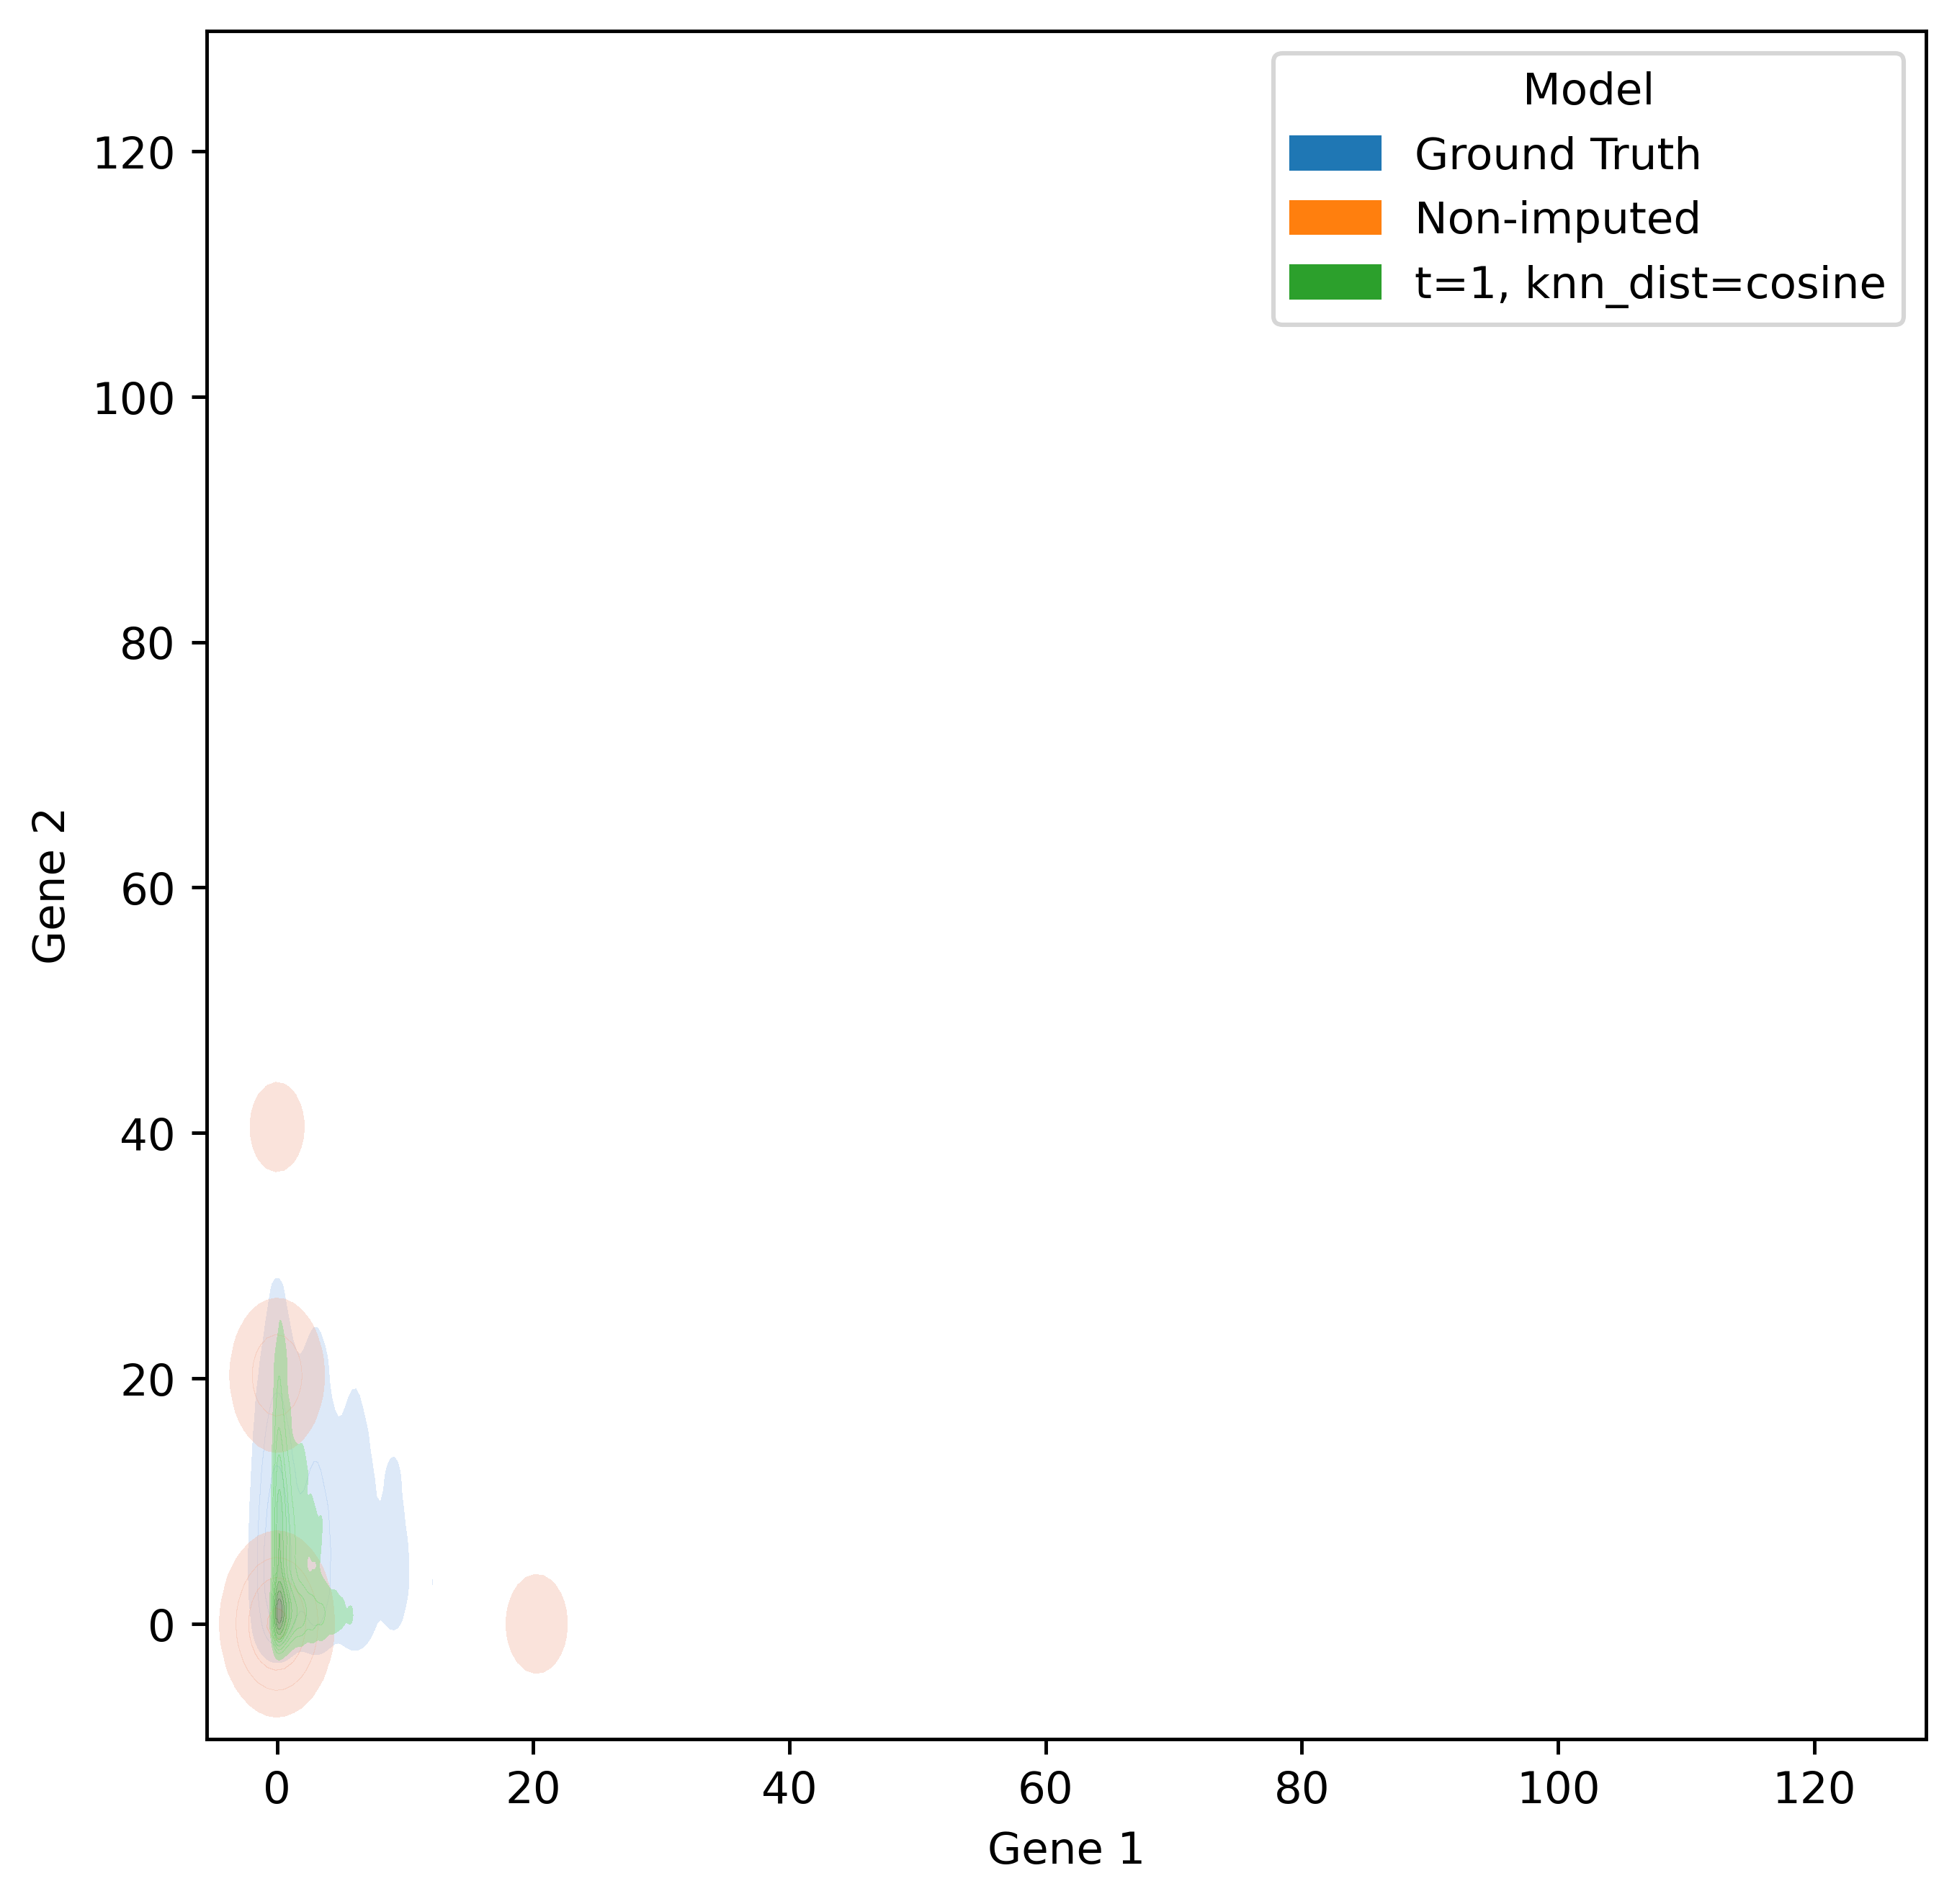

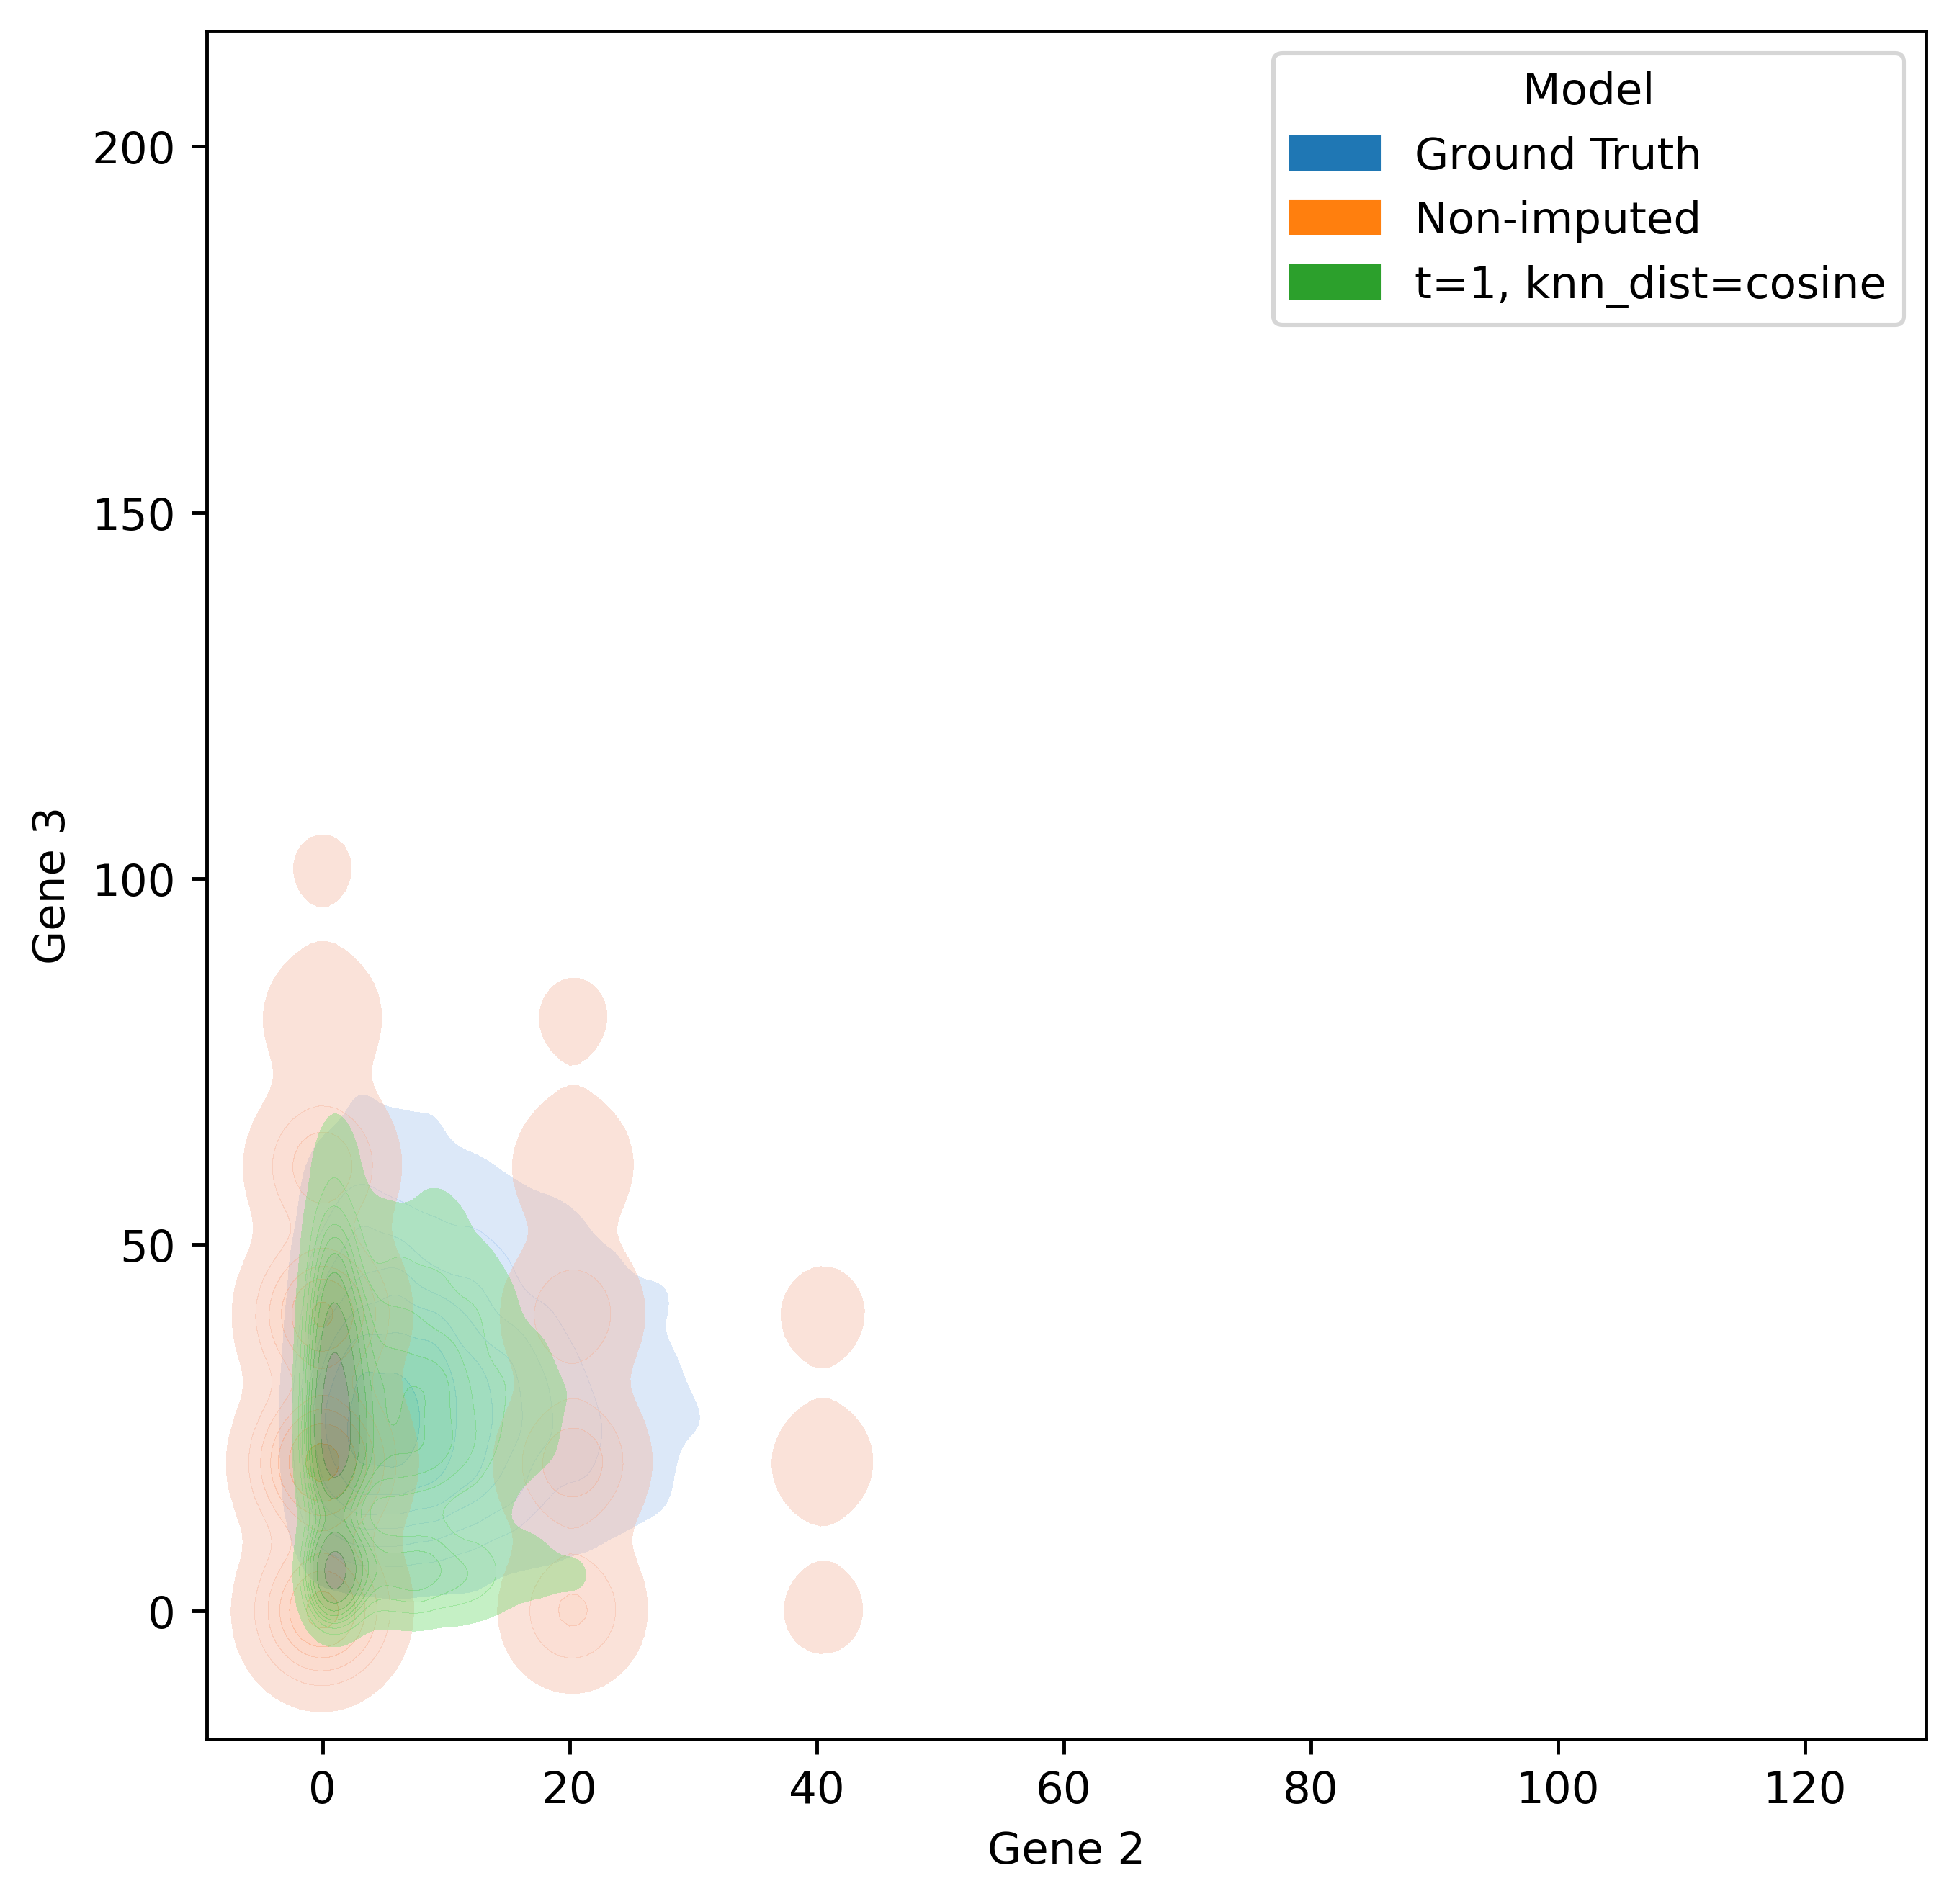

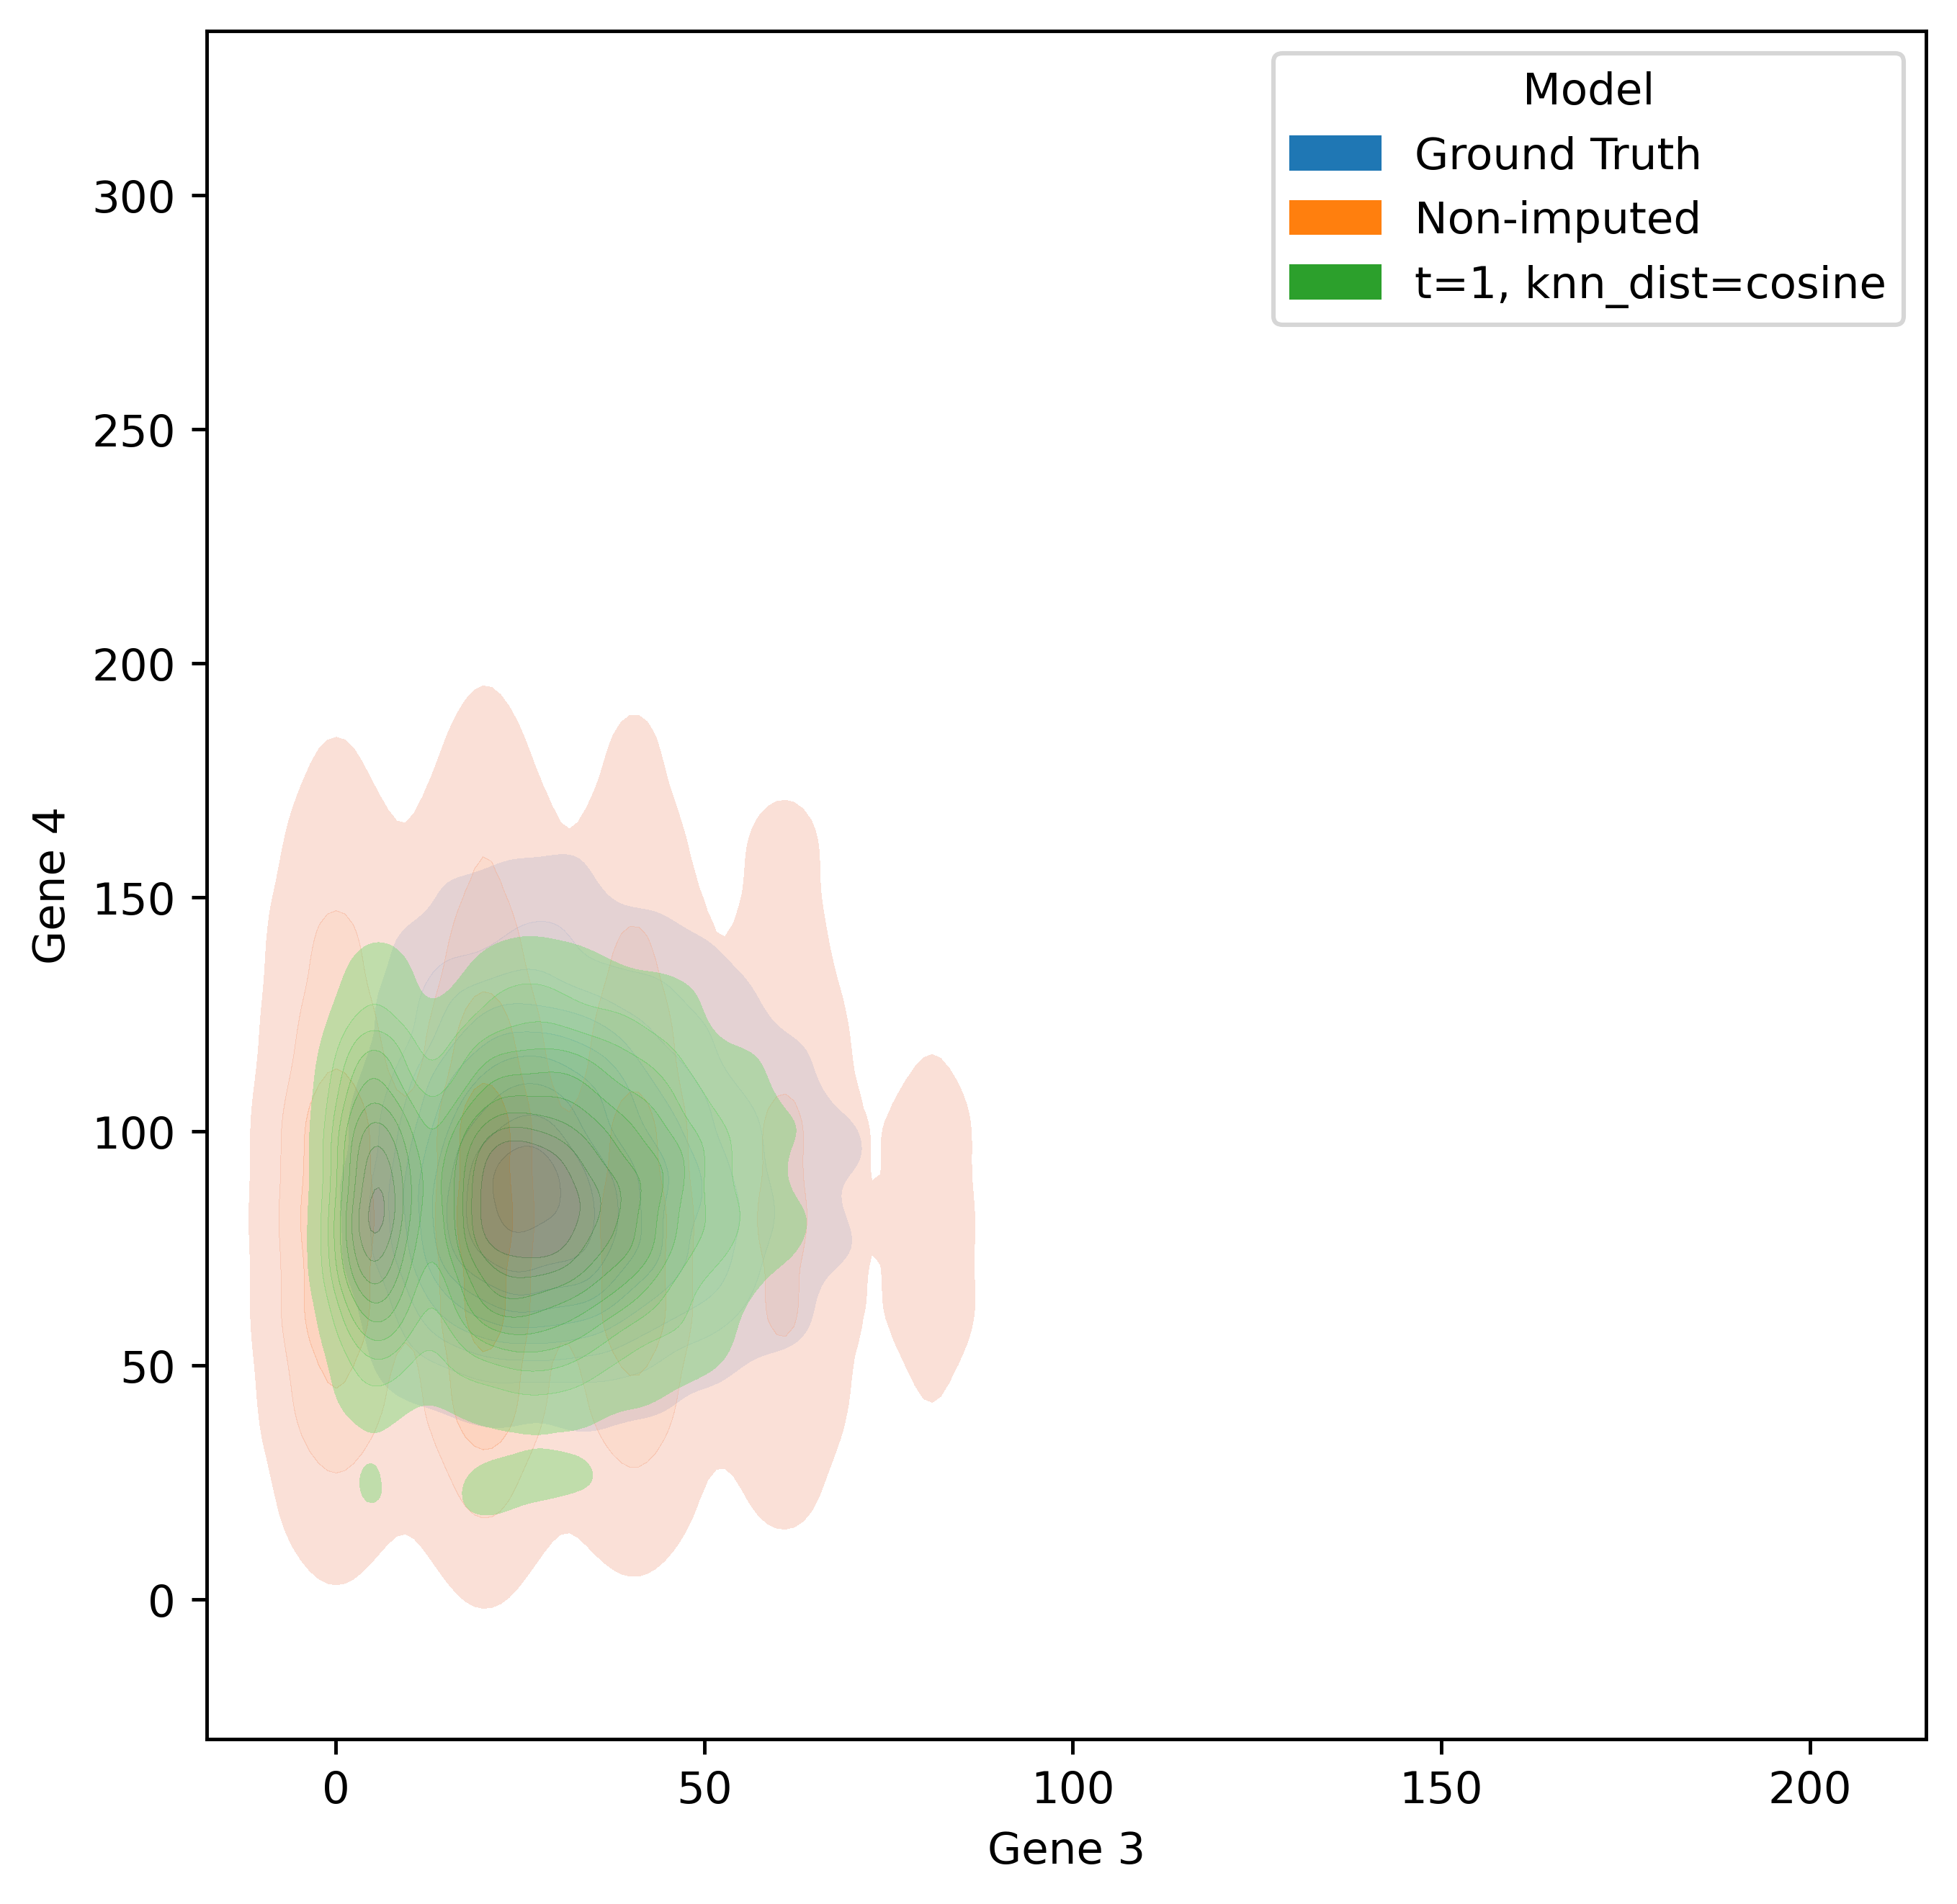

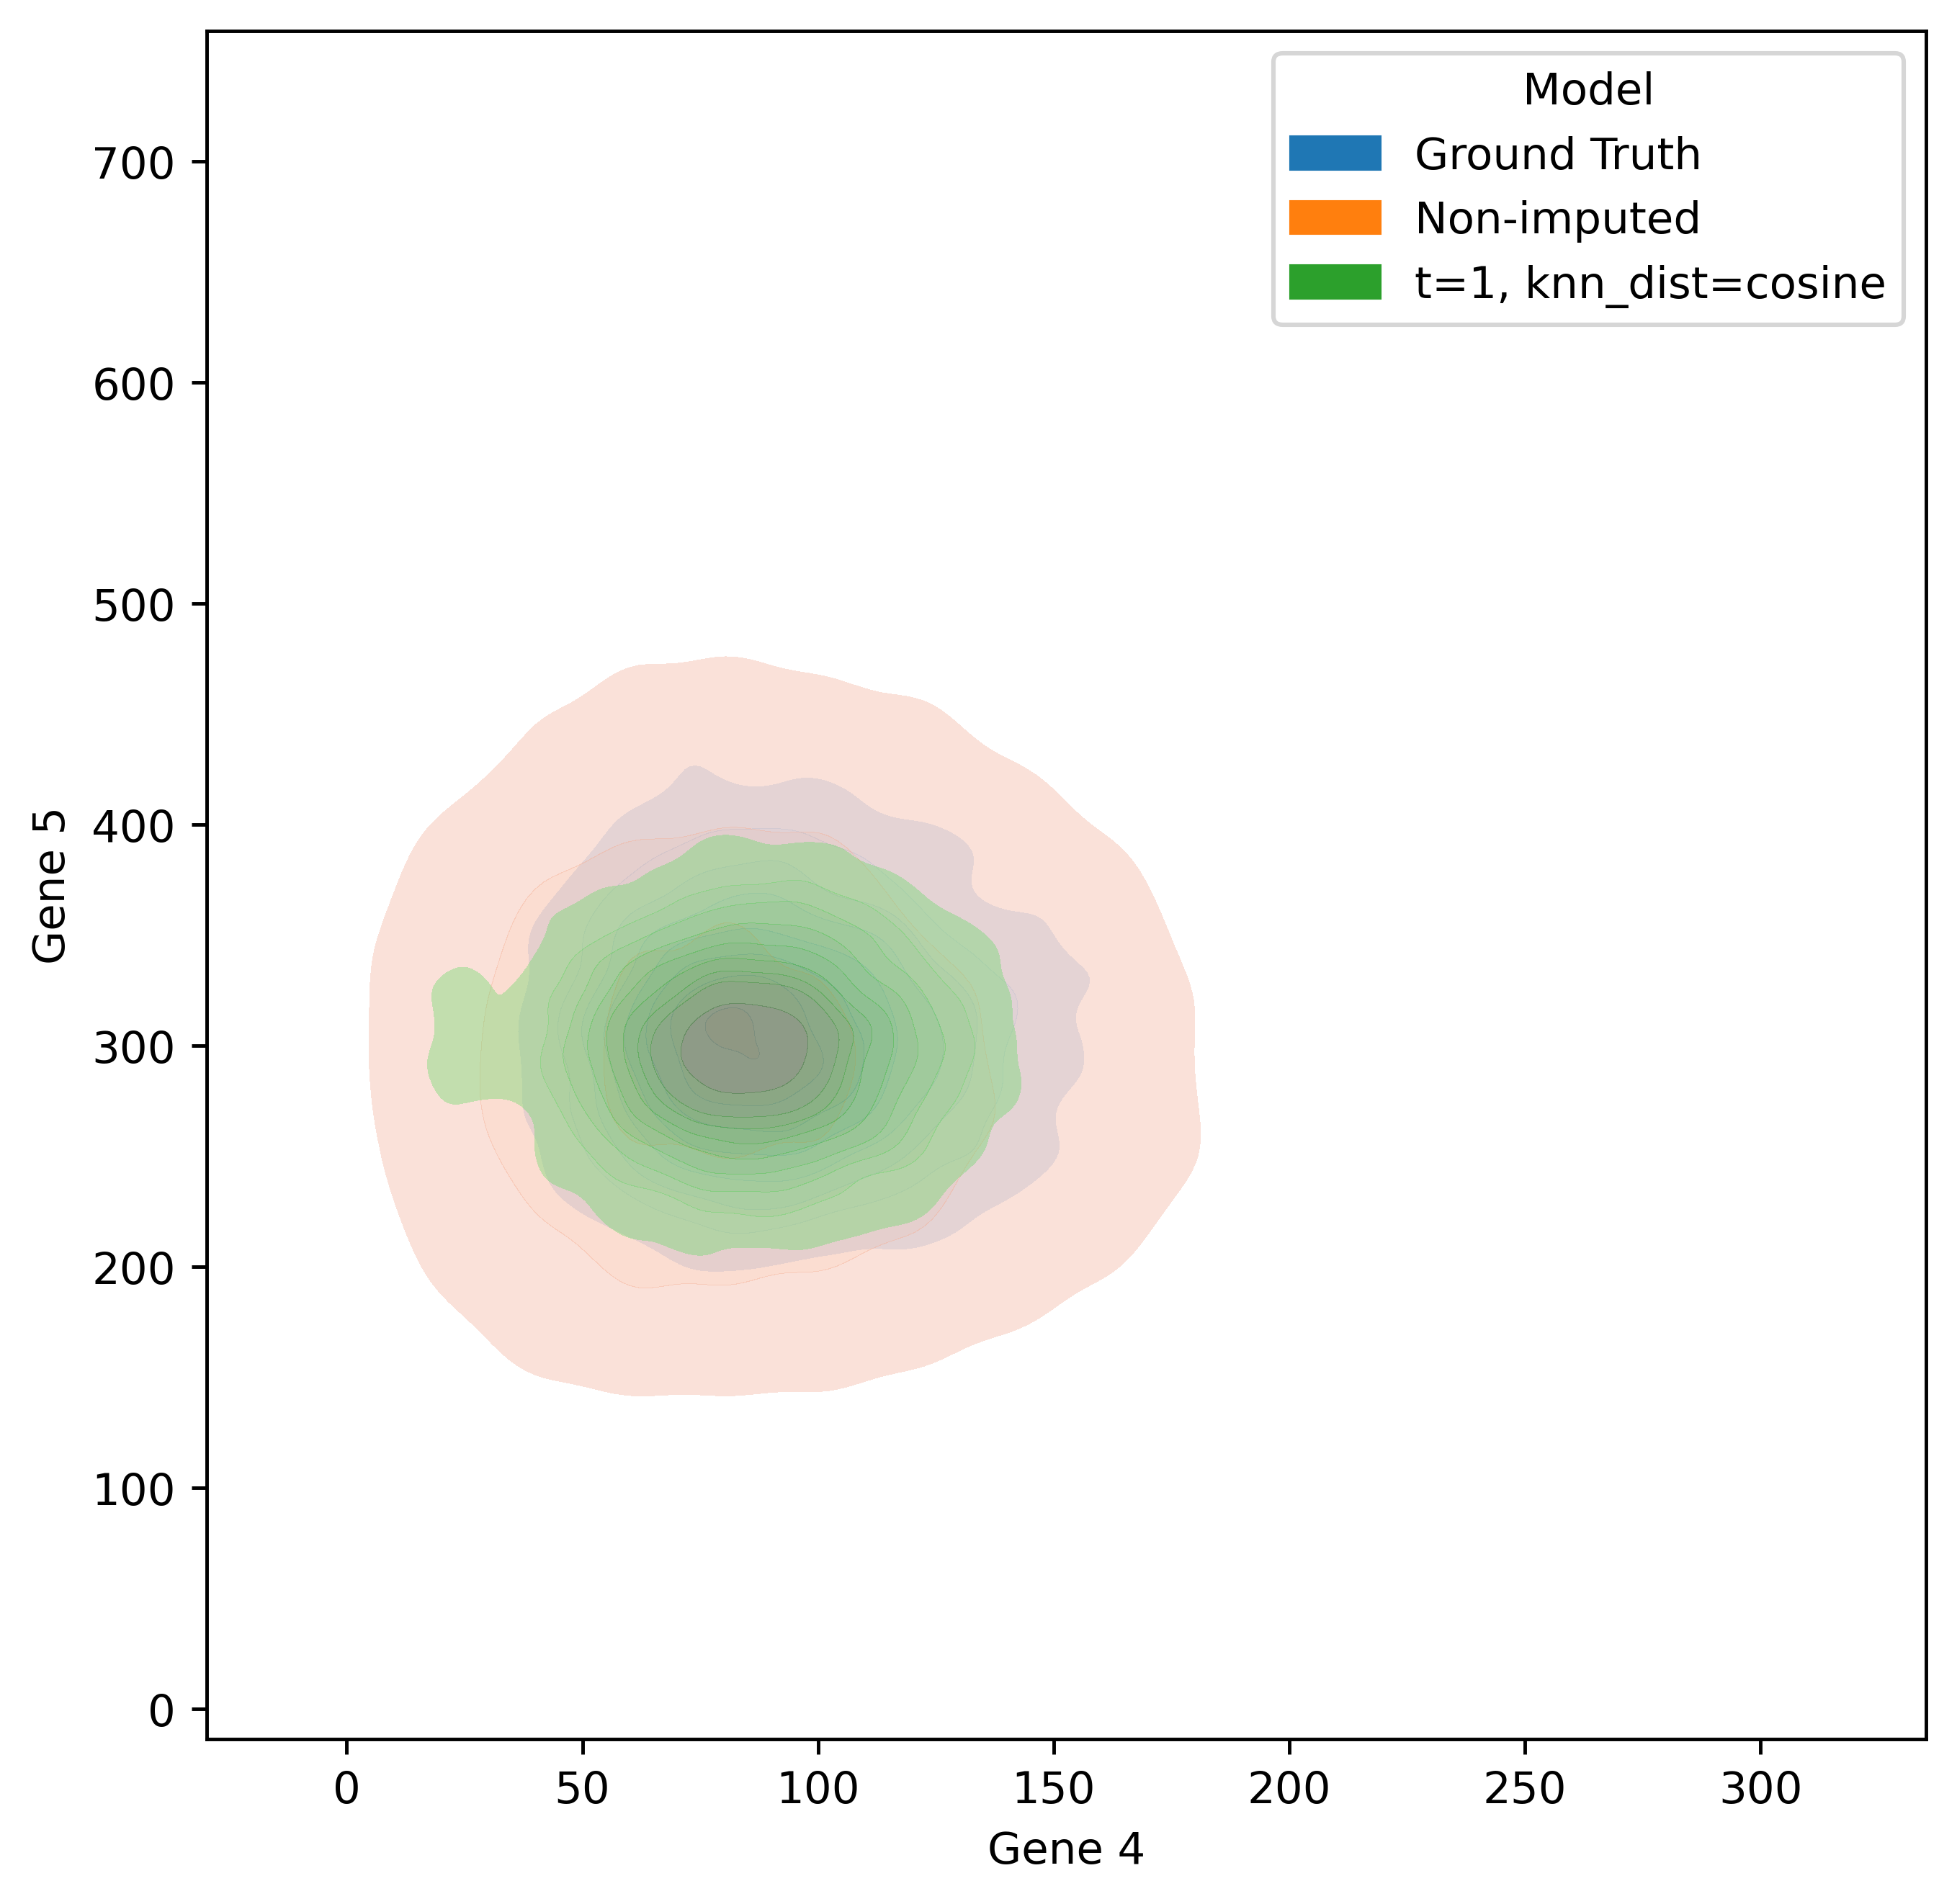

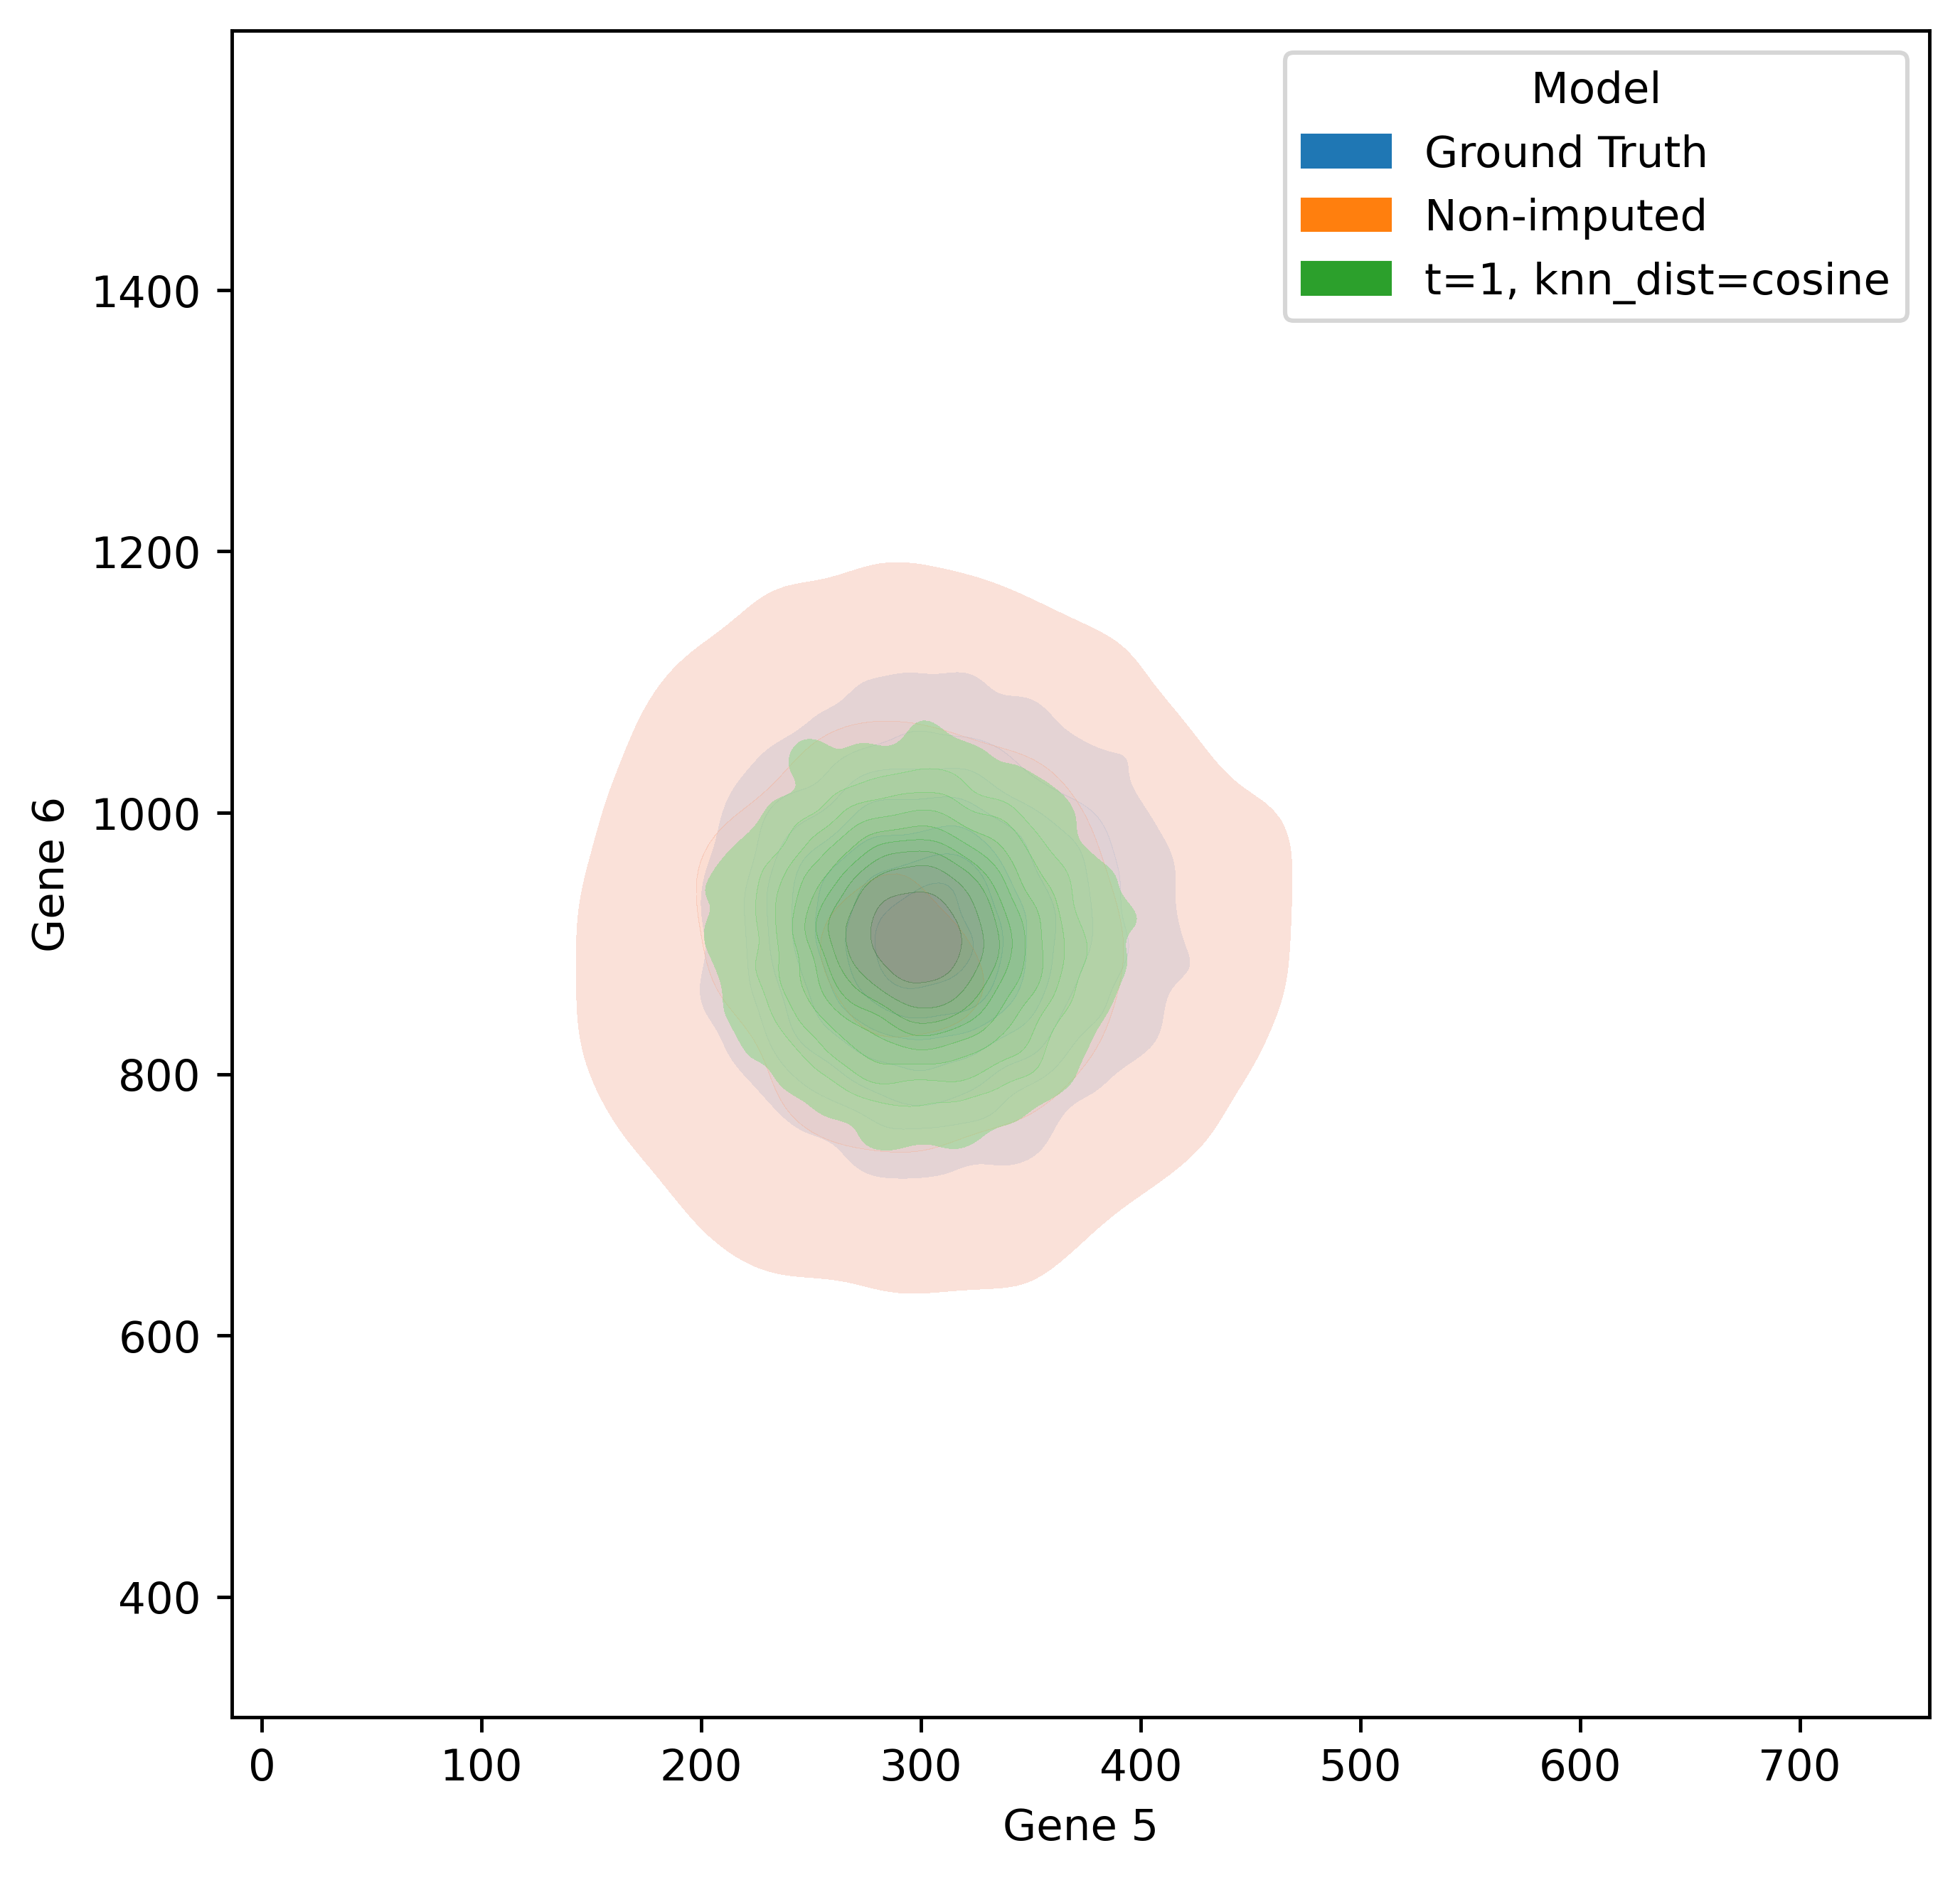

In [48]:
for i in range(5): 
    plt.figure()
    sns.kdeplot(data=best_imputation, x=genes[i], y =genes[i+1], hue="Model", alpha=0.4, fill=True)

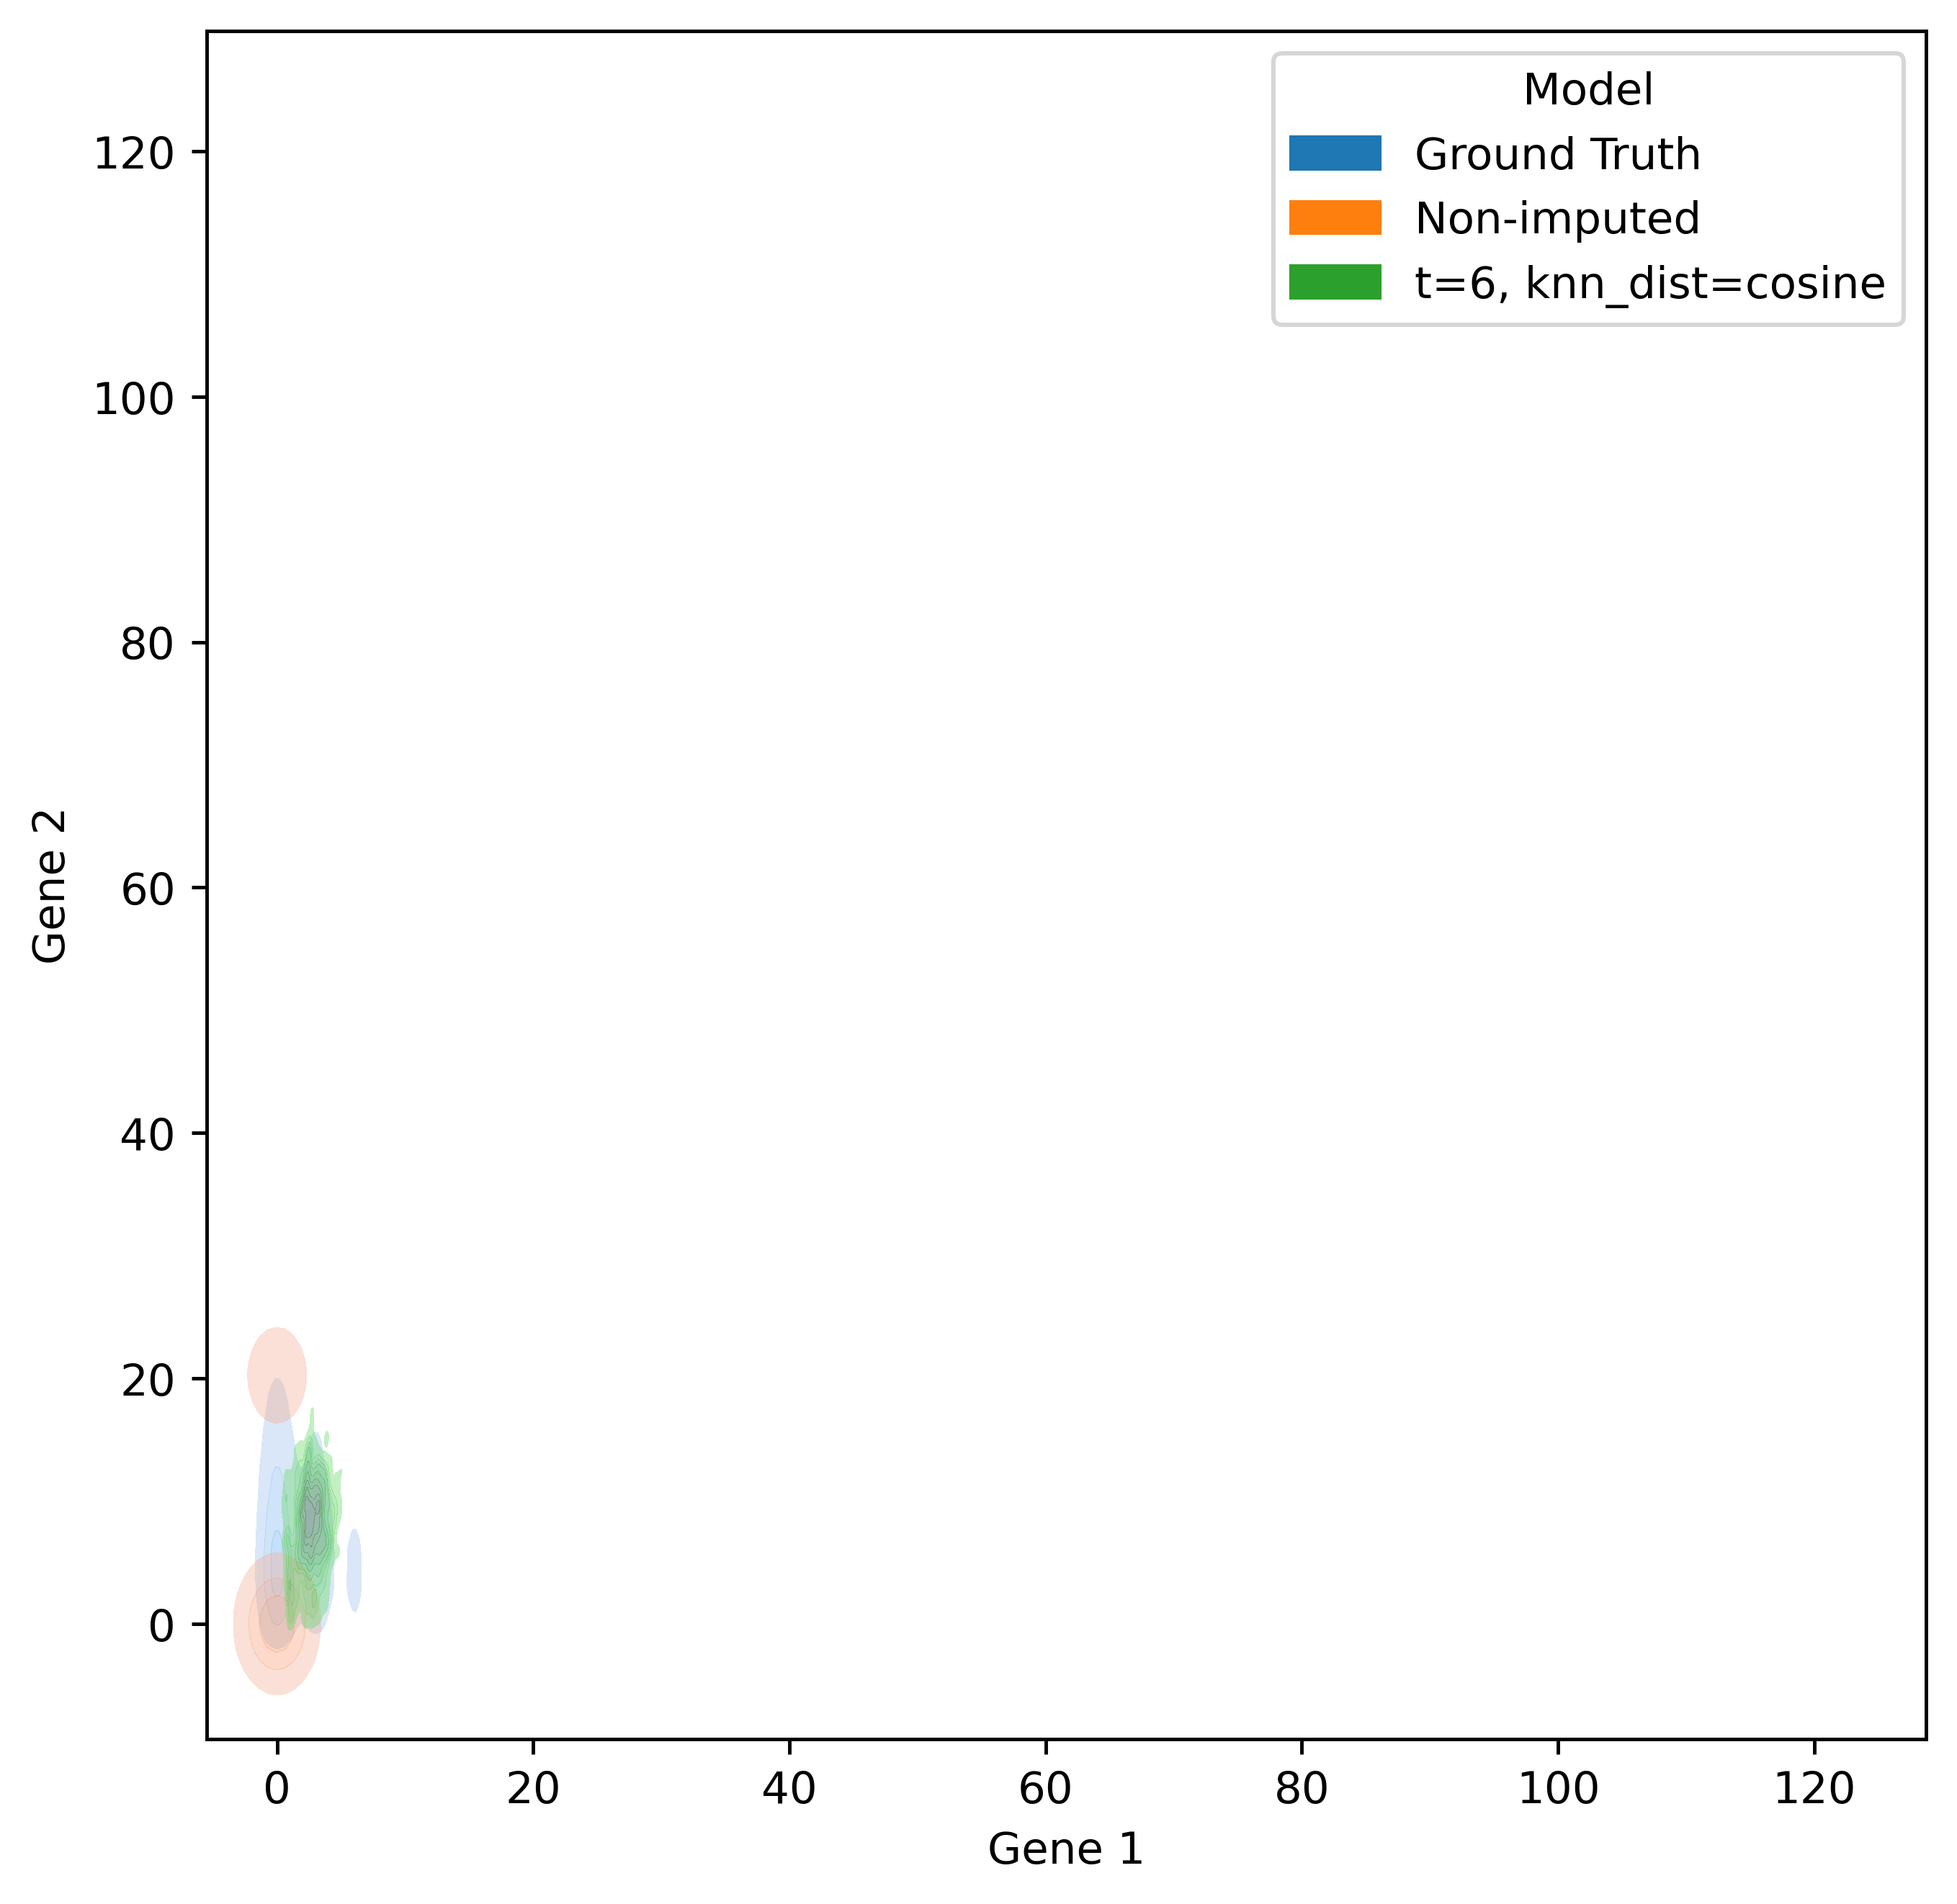

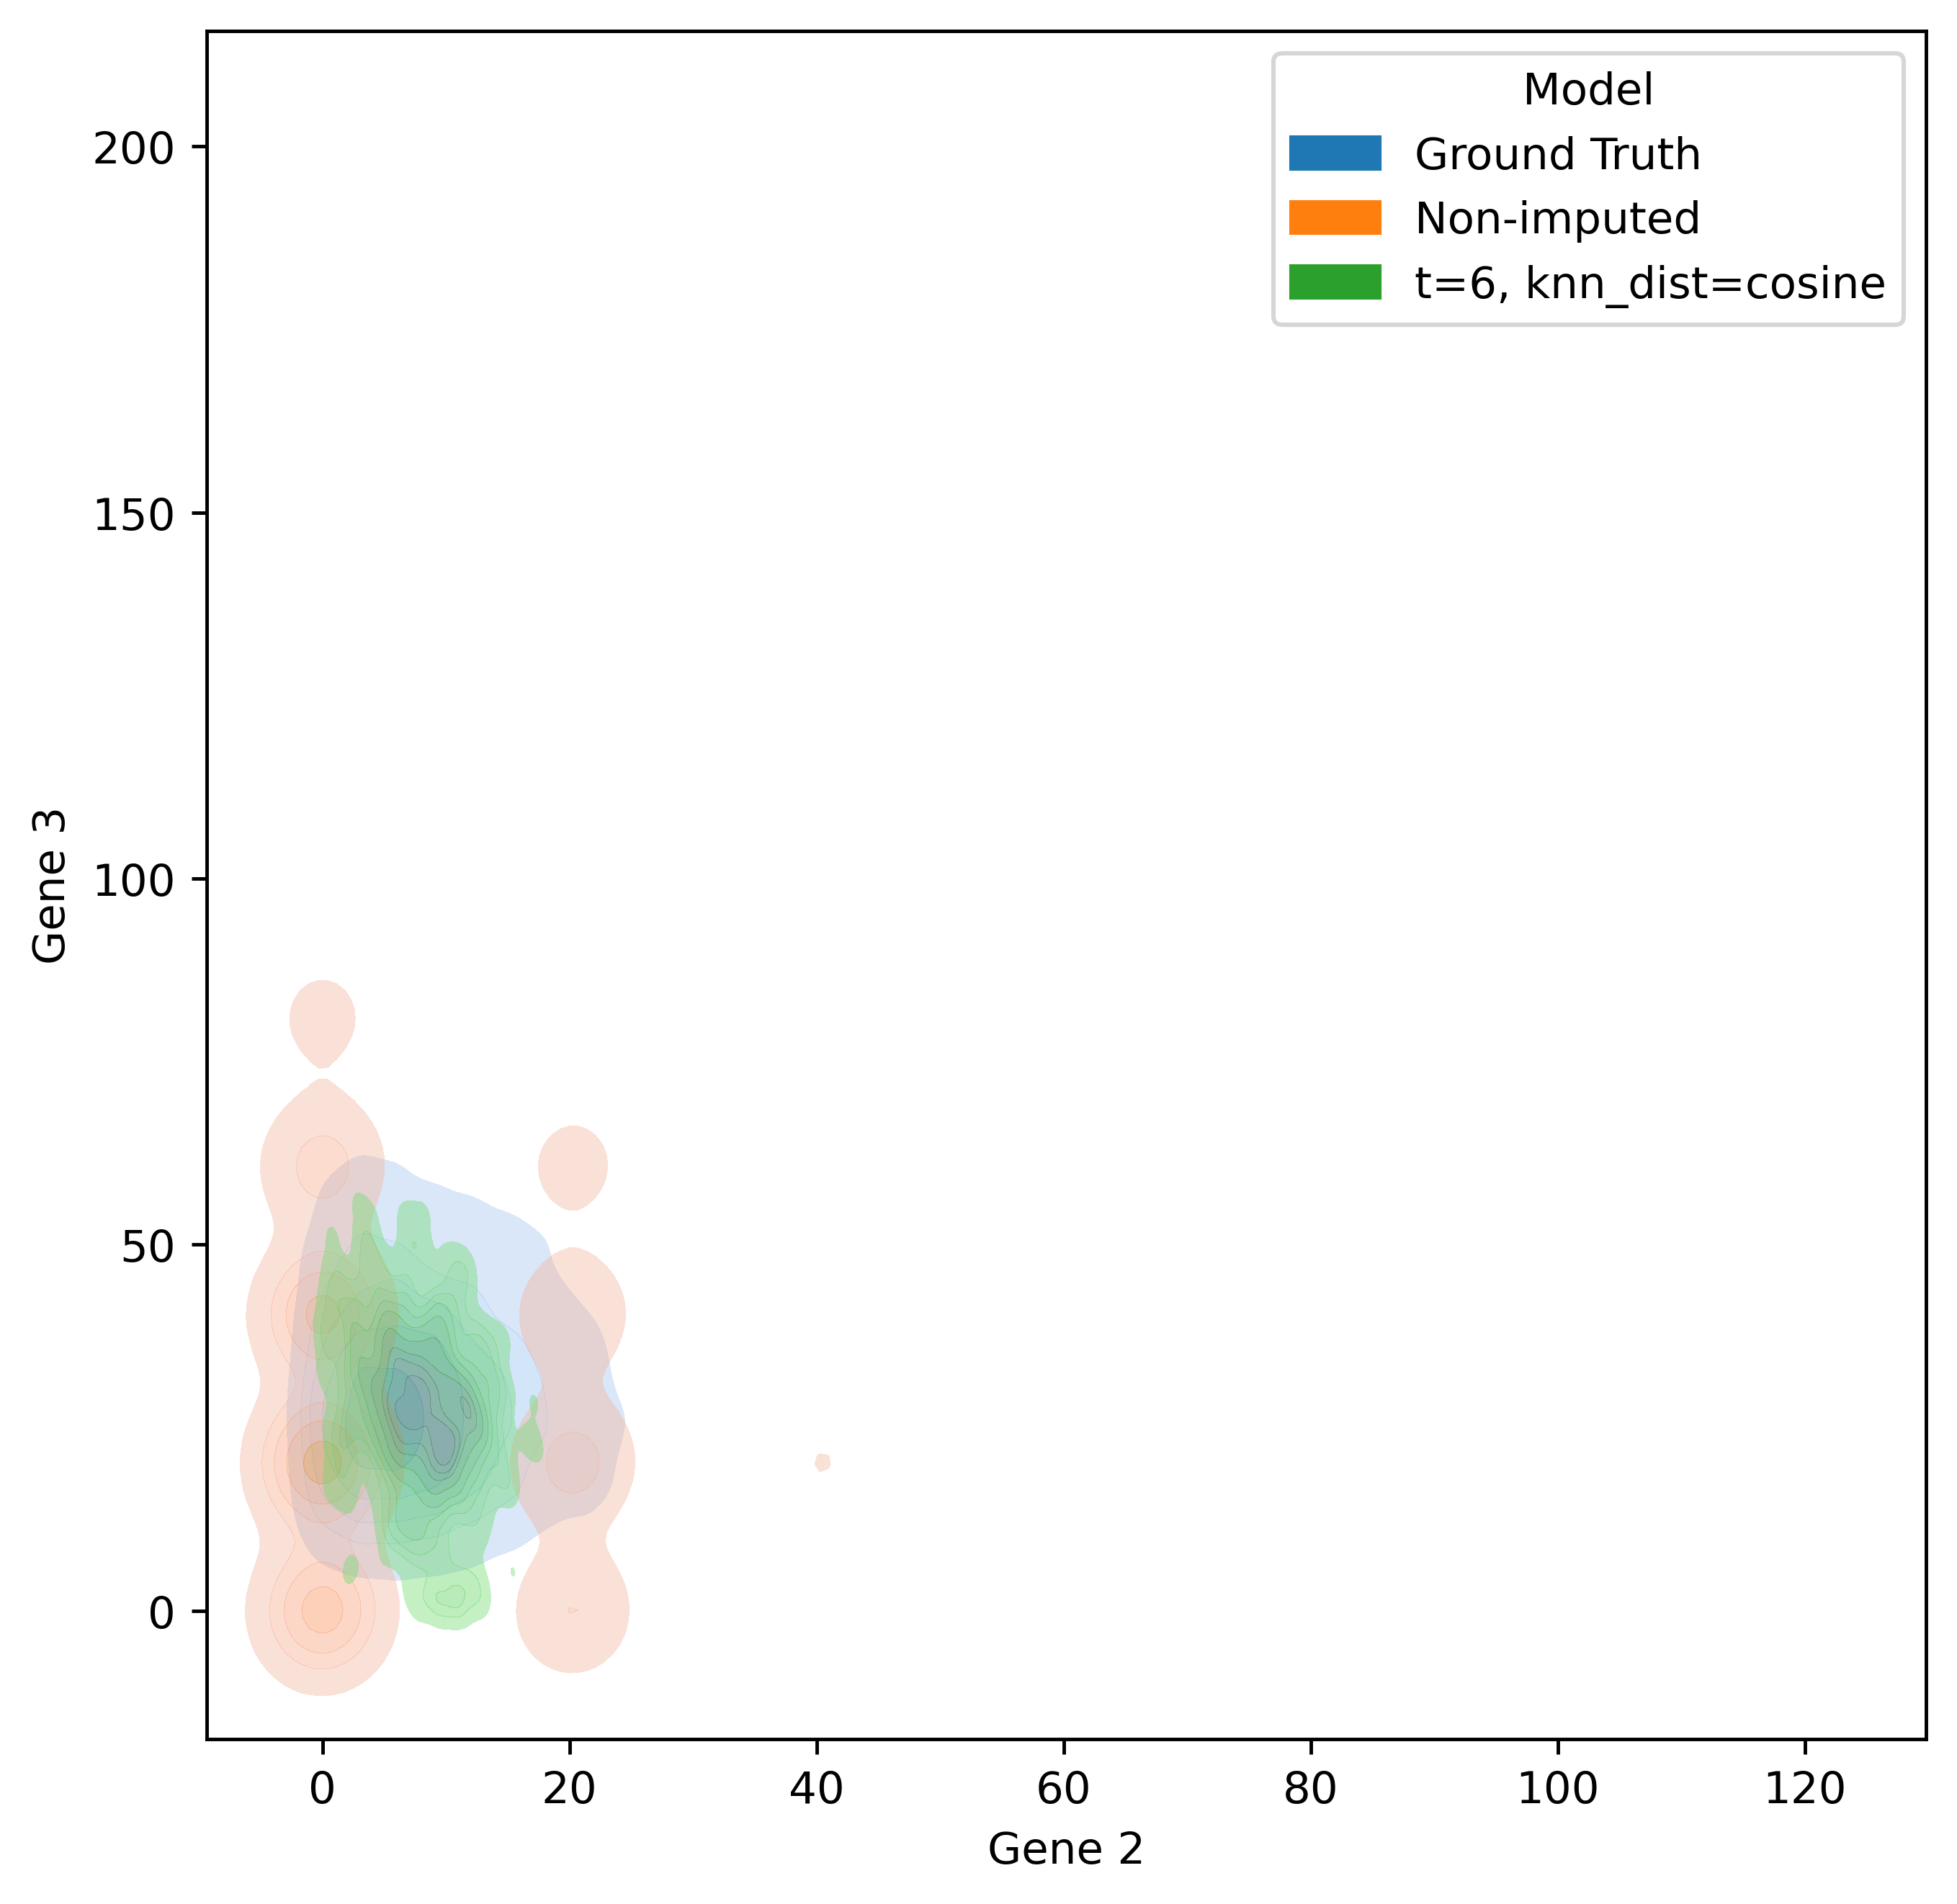

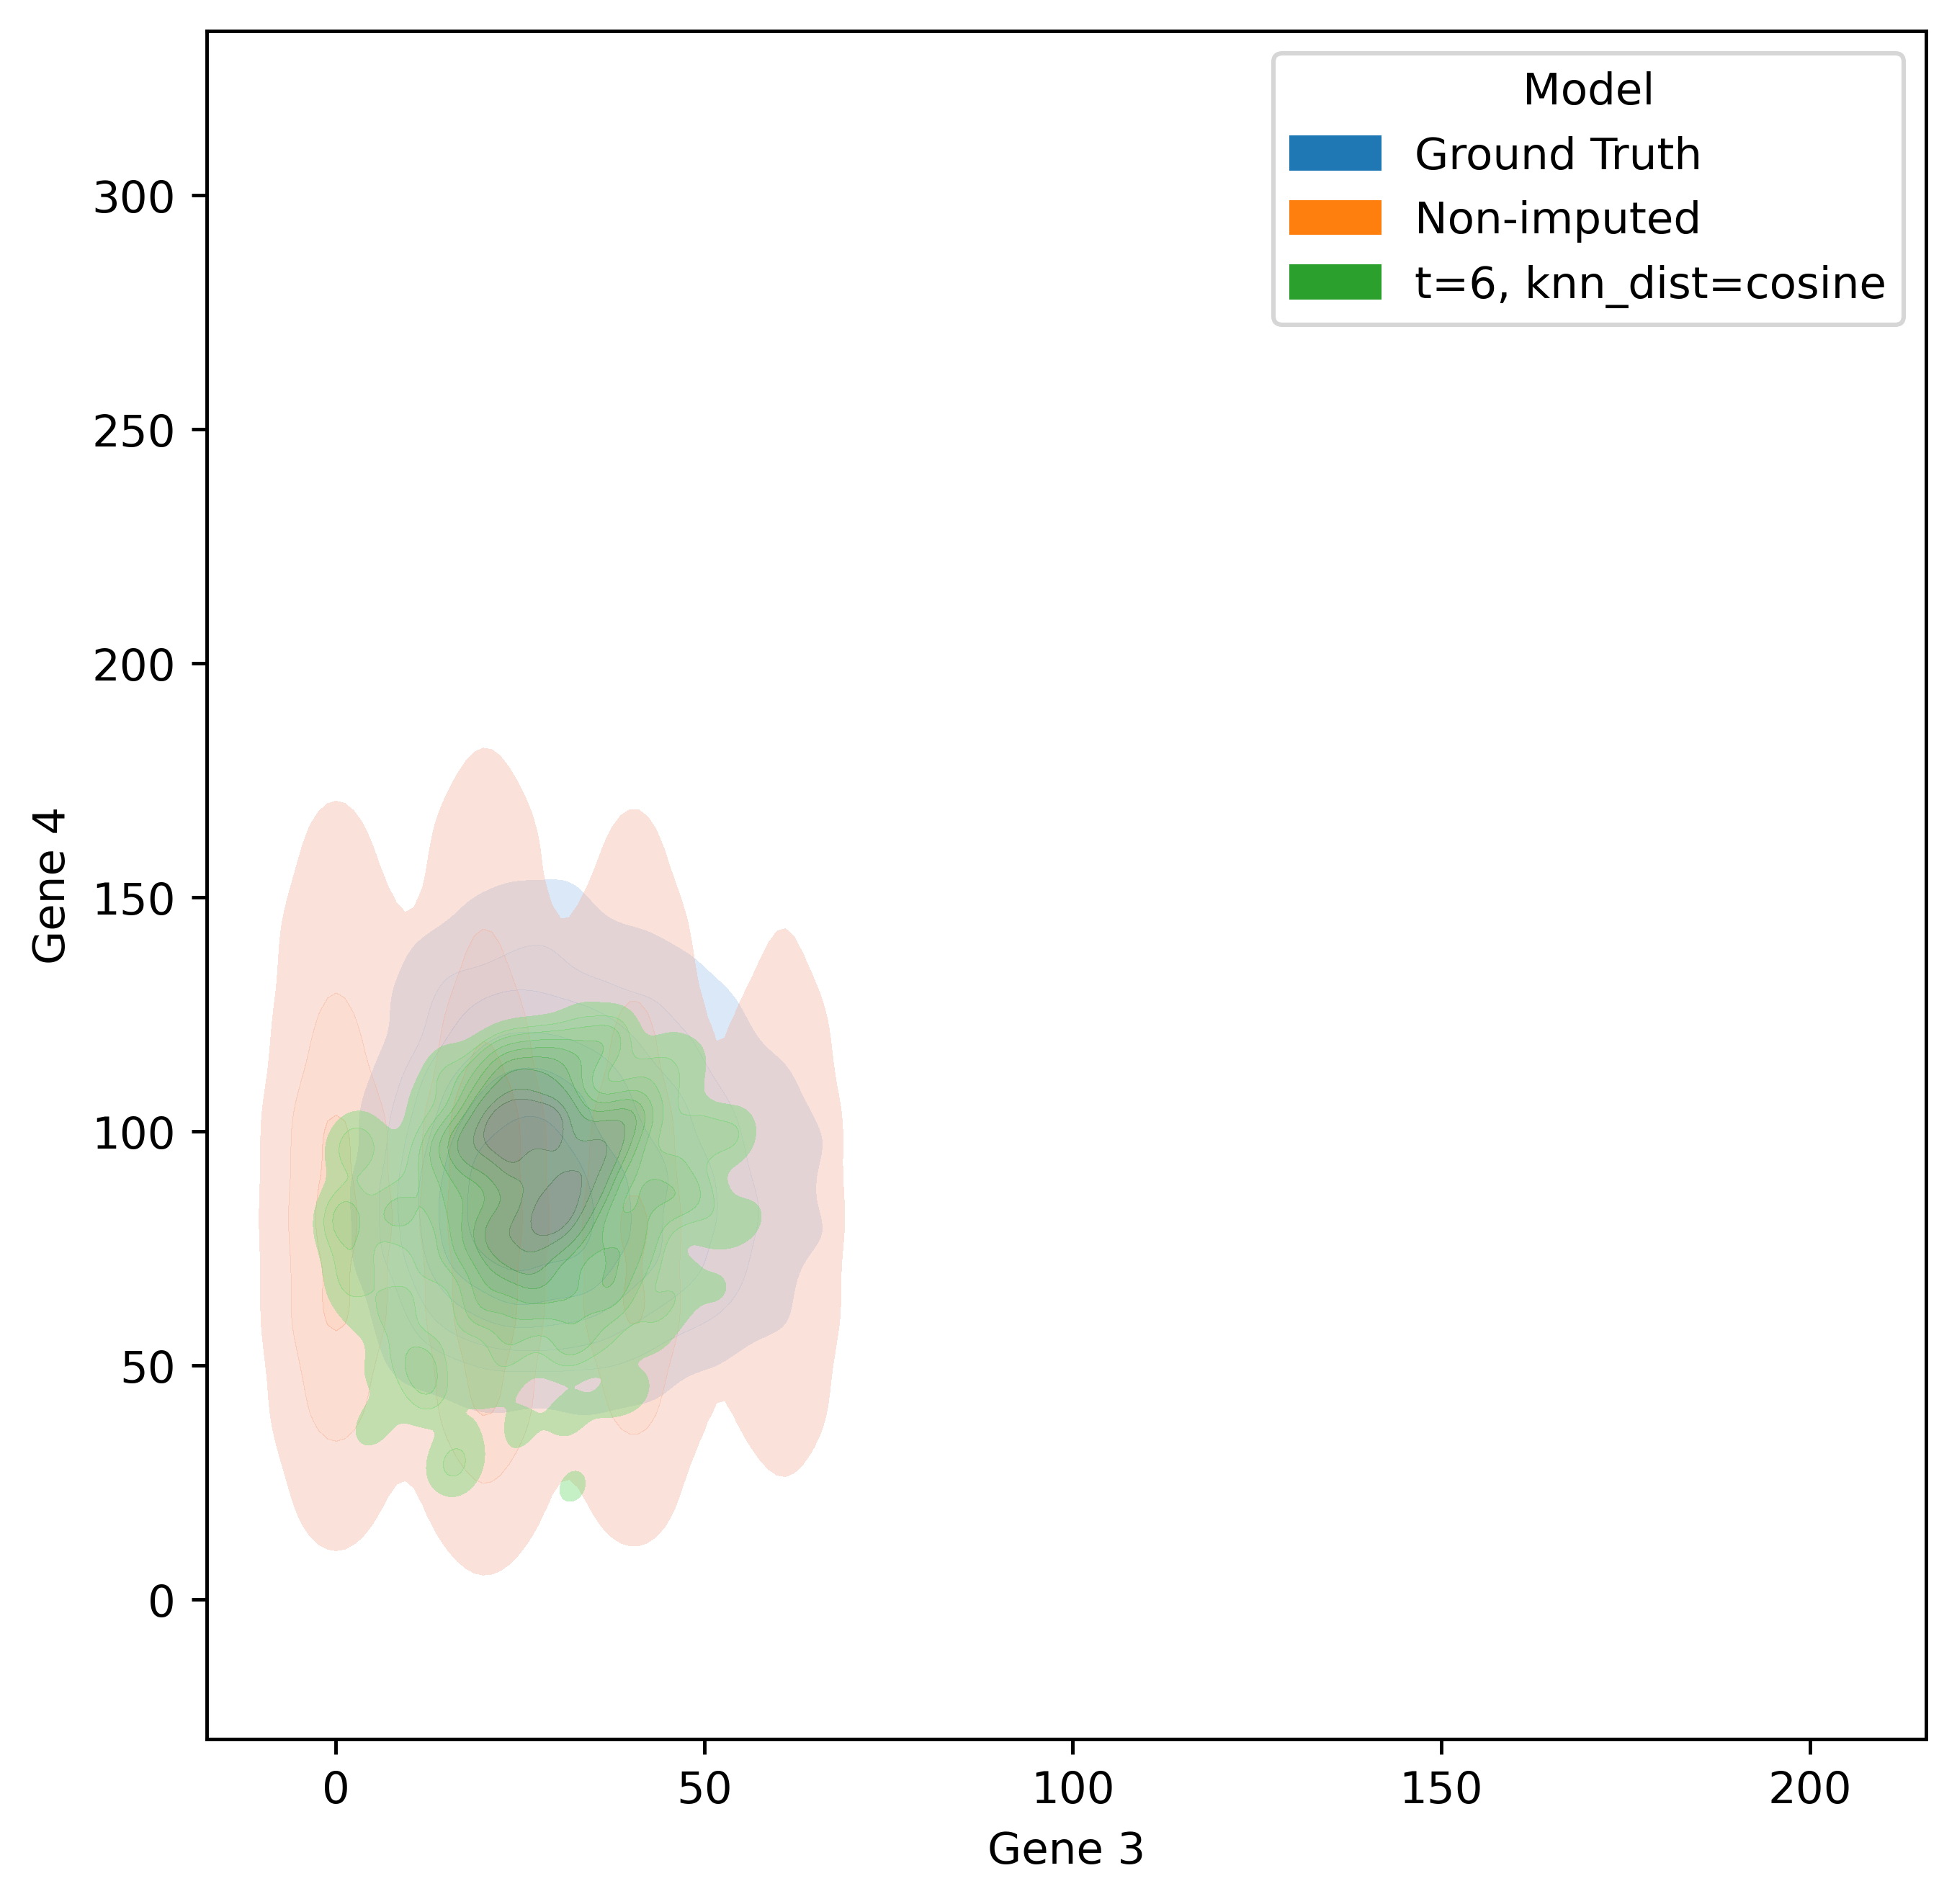

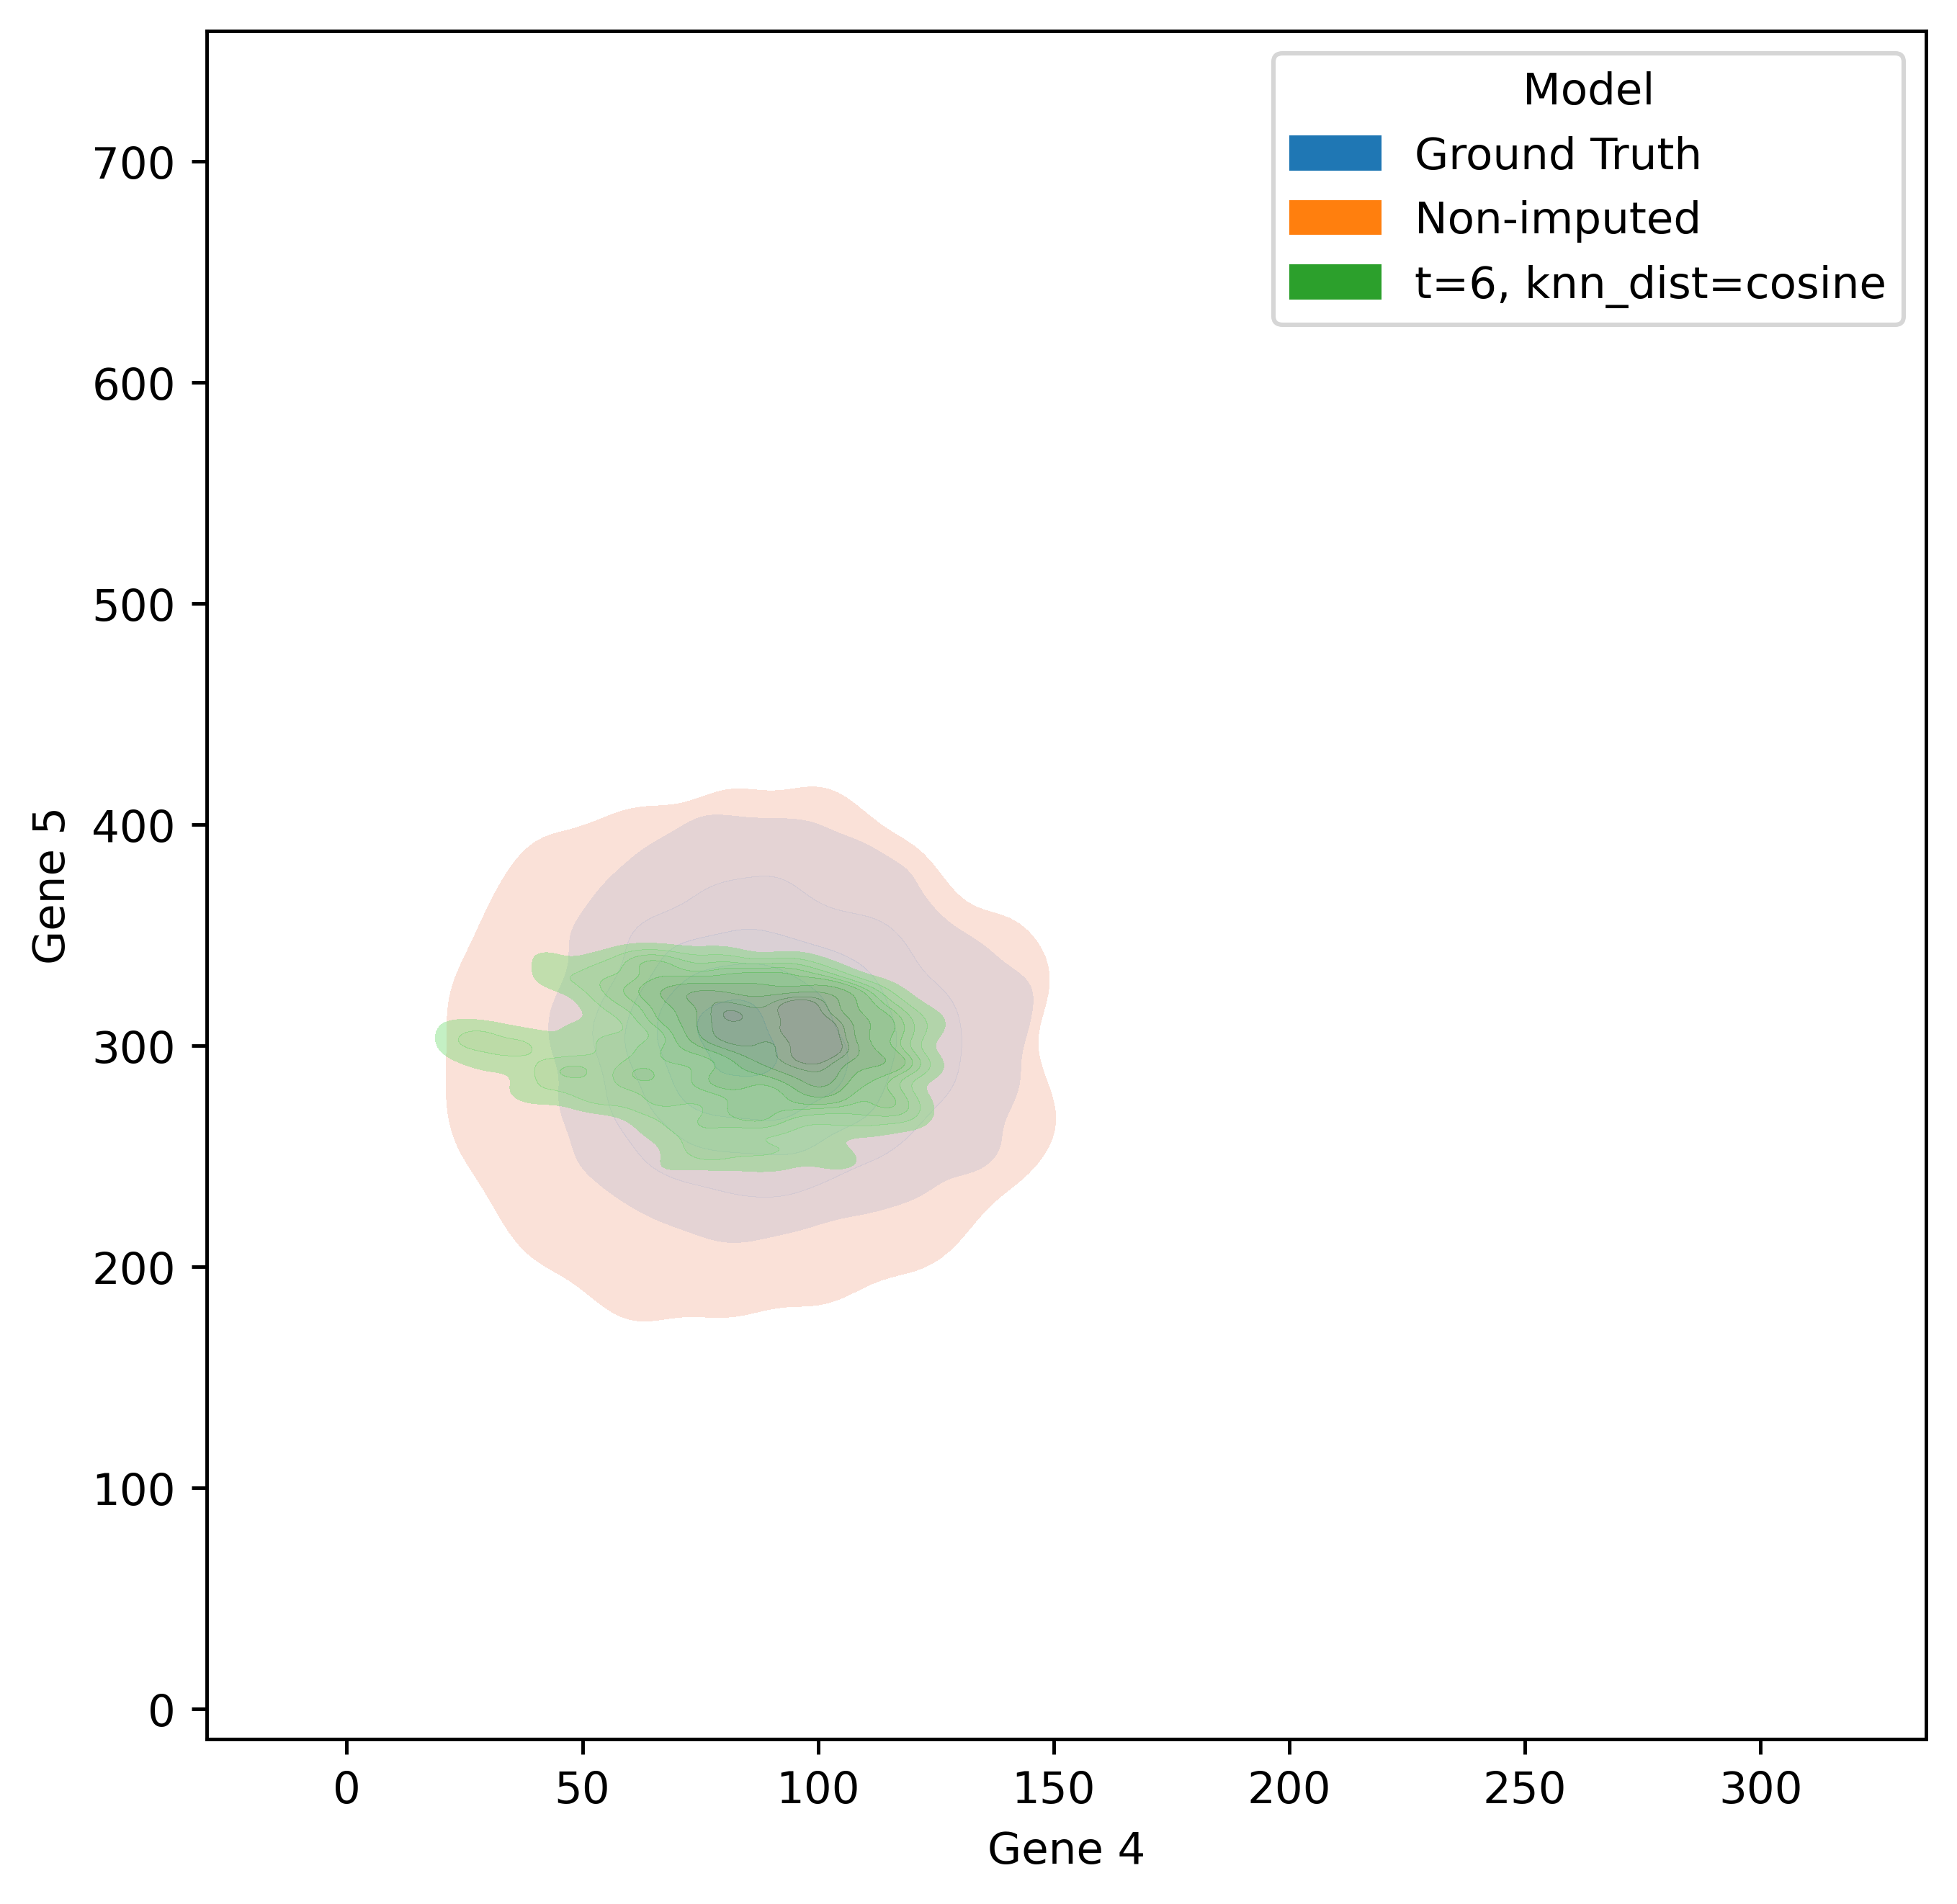

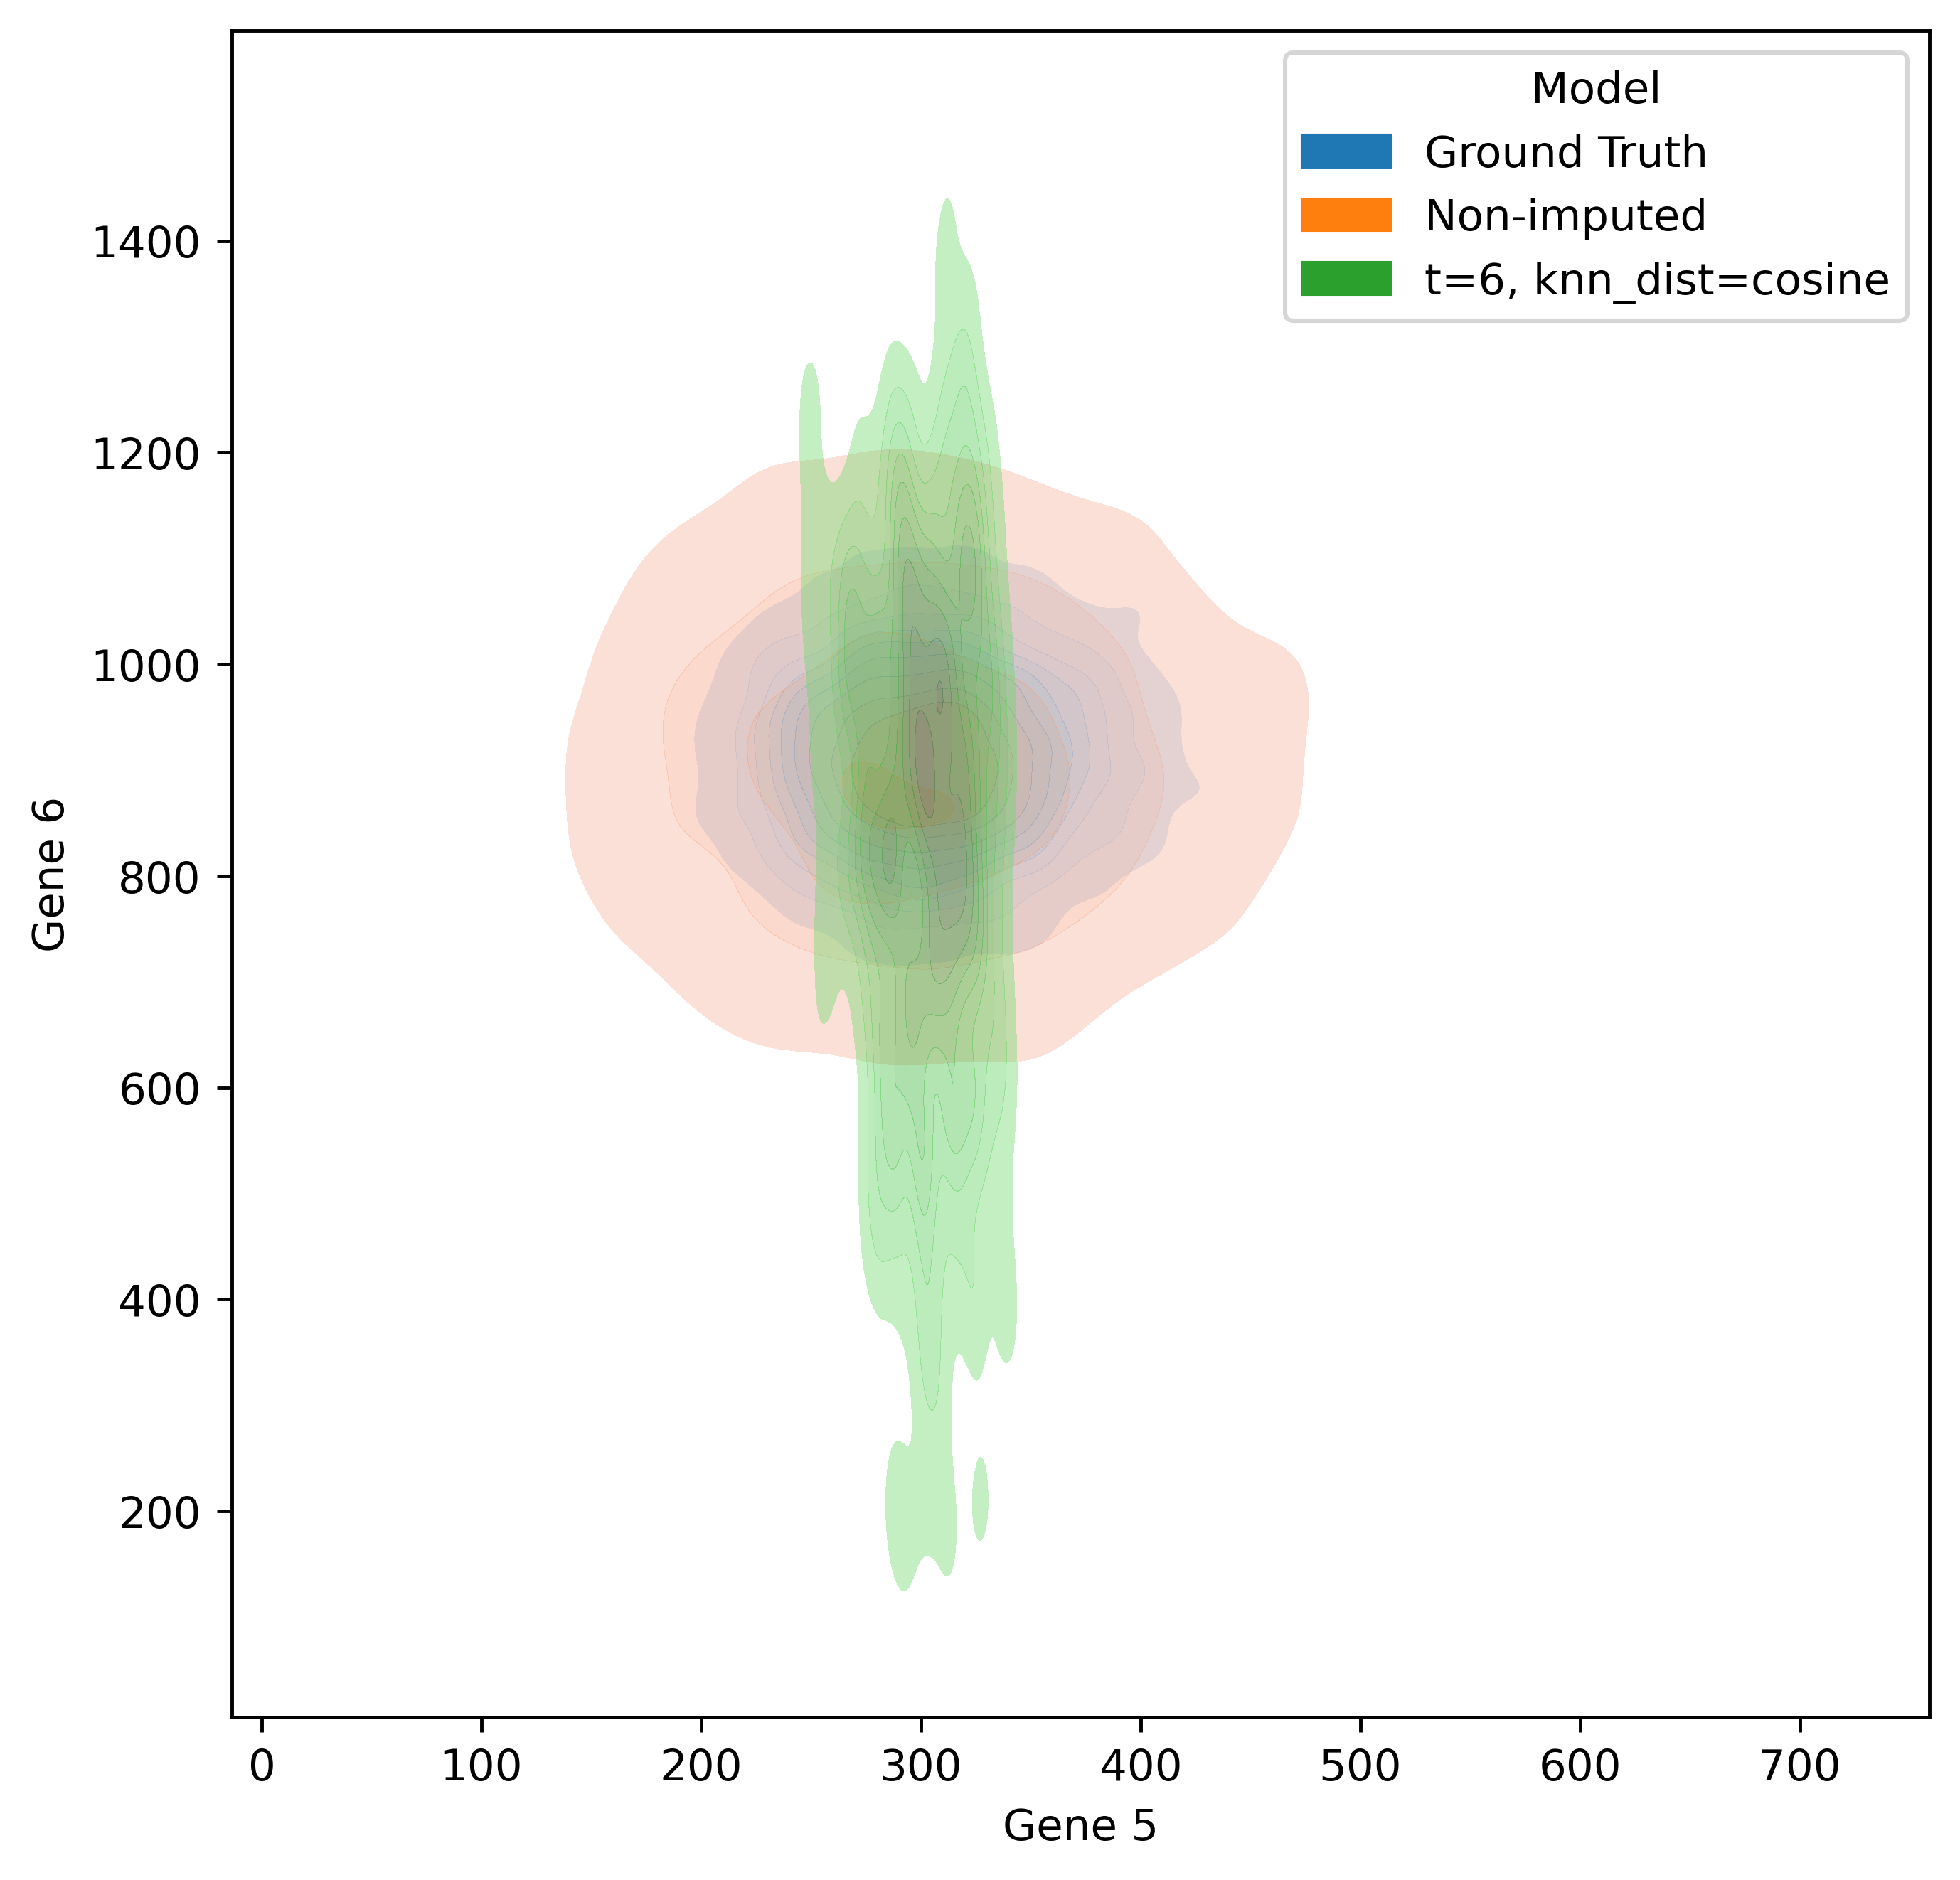

In [49]:
for i in range(5): 
    plt.figure()
    sns.kdeplot(data=worst_imputation, x=genes[i], y =genes[i+1], hue="Model", alpha=0.4, fill=True)